In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import warnings
from matplotlib import pyplot as plt
import itertools
import glob, os
import statsmodels.api as sm
from numpy.polynomial.polynomial import polyfit

warnings.filterwarnings('ignore')

# Problem Statement:
- Which sectors contribute to a state's GDP?
- Does education dropout rate effect the GDP?

## PART I - Analysing GDP of all States over the years

## Loading the GDP csv file for all the states in India

In [68]:
gdp_df = pd.read_csv('./datasets/GDP.csv')
gdp_df.head(5)

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.0,11063.0,143175.0,247144.0,158074.0,42367.0,615606.0,297539.0,...,359433.0,19208.0,724049.0,115523.0,NaN,3979.0,18768.0,343767.0,16818.0,8736039.0
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.0,12547.0,156864.0,282368.0,177511.0,38120.0,724495.0,347032.0,...,401493.0,21663.0,822903.0,131835.0,NaN,4421.0,21609.0,391238.0,18875.0,9946636.0
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.0,14602.0,177745.0,317101.0,206690.0,35921.0,807623.0,400662.0,...,452186.0,25593.0,944146.0,149817.0,NaN,5159.0,24787.0,443783.0,21870.0,11236635.0
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.0,16761.0,198098.0,373920.0,234982.0,40633.0,895027.0,437462.0,...,511178.0,29667.0,1043371.0,161985.0,NaN,5721.0,27844.0,492424.0,24089.0,12433749.0
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,...,575631.0,NaN,1153795.0,184091.0,NaN,NaN,30304.0,551963.0,26533.0,13675331.0


## Checking the data type and column name

In [69]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Items  Description         11 non-null     object 
 1   Duration                   11 non-null     object 
 2   Andhra Pradesh             11 non-null     float64
 3   Arunachal Pradesh          9 non-null      float64
 4   Assam                      9 non-null      float64
 5   Bihar                      9 non-null      float64
 6   Chhattisgarh               11 non-null     float64
 7   Goa                        9 non-null      float64
 8   Gujarat                    9 non-null      float64
 9   Haryana                    11 non-null     float64
 10  Himachal Pradesh           7 non-null      float64
 11  Jammu & Kashmir            9 non-null      float64
 12  Jharkhand                  9 non-null      float64
 13  Karnataka                  9 non-null      float64
 

## Observation from the info:
- There are two categorical columns - Items description and duration
- There are some null rows in the above columns. West Bengal has 0 non-null values.
- We also need to remove the union territories because we are only including the states in the analysis

In [70]:
gdp_df.columns

Index(['Items  Description', 'Duration', 'Andhra Pradesh ',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal1', 'Andaman & Nicobar Islands',
       'Chandigarh', 'Delhi', 'Puducherry', 'All_India GDP'],
      dtype='object')

In [71]:
# We need to remove the additional spaces in the State names
gdp_df.columns = gdp_df.columns.str.strip()
list(gdp_df.columns)

['Items  Description',
 'Duration',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Chhattisgarh',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu & Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Odisha',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Telangana',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal1',
 'Andaman & Nicobar Islands',
 'Chandigarh',
 'Delhi',
 'Puducherry',
 'All_India GDP']

## Dropping values of union territories
- We are droppig them because we will use only states in analysis.

In [72]:
union_territories = ["Andaman & Nicobar Islands", "Chandigarh", "Delhi", "Puducherry"]
gdp_df.drop(union_territories, axis = 1, inplace = True) 
gdp_df.head(11)

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.00,11063.00,143175.00,247144.00,158074.00,42367.00,615606.00,297539.00,...,266628.00,436465.00,11165.00,751485.00,359433.00,19208.00,724049.00,115523.00,NaN,8736039.00
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.00,12547.00,156864.00,282368.00,177511.00,38120.00,724495.00,347032.00,...,297734.00,494004.00,12338.00,855481.00,401493.00,21663.00,822903.00,131835.00,NaN,9946636.00
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.00,14602.00,177745.00,317101.00,206690.00,35921.00,807623.00,400662.00,...,334714.00,549701.00,13862.00,971090.00,452186.00,25593.00,944146.00,149817.00,NaN,11236635.00
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.00,16761.00,198098.00,373920.00,234982.00,40633.00,895027.00,437462.00,...,368011.00,612194.00,15209.00,1092564.00,511178.00,29667.00,1043371.00,161985.00,NaN,12433749.00
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.00,18784.00,224234.00,413503.00,260776.00,45002.00,994316.00,485184.00,...,NaN,NaN,16637.00,1212668.00,575631.00,NaN,1153795.00,184091.00,NaN,13675331.00
5,GSDP - CURRENT PRICES (` in Crore),2016-17,699307.00,NaN,NaN,NaN,290140.00,NaN,NaN,547396.00,...,NaN,NaN,NaN,1338766.00,654294.00,NaN,NaN,NaN,NaN,15251028.00
6,(% Growth over previous year),2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,...,11.67,13.18,10.51,13.84,11.70,12.78,13.65,14.12,NaN,13.86
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,12.42,11.27,12.35,13.51,12.63,18.14,14.73,13.64,NaN,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,9.95,11.37,9.72,12.51,13.05,15.92,10.51,8.12,NaN,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,NaN,NaN,9.39,10.99,12.61,NaN,10.58,13.65,NaN,9.99


## Checking for NaN Values in the data frame

In [73]:
datacheck = pd.DataFrame(index = ["Missing Values"])
for column in gdp_df.columns:
    datacheck[column] = [gdp_df[column].isnull().sum().sum()] #This code sums all the NaN values for each of the columns 

datacheck

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,All_India GDP
Missing Values,0,0,0,2,2,2,0,2,2,0,...,4,4,2,0,0,4,2,2,11,0


In [74]:
maxMissingState = datacheck.idxmax(axis=1)[0]
print("The State with maximum NaN values is {0} with {1} NaN values ".format(maxMissingState, datacheck[maxMissingState]["Missing Values"]))

The State with maximum NaN values is West Bengal1 with 11 NaN values 


In [75]:
gdp_df.drop([maxMissingState], axis = 1, inplace = True) 
gdp_df.head()

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.0,11063.0,143175.0,247144.0,158074.0,42367.0,615606.0,297539.0,...,227872.0,266628.0,436465.0,11165.0,751485.0,359433.0,19208.0,724049.0,115523.0,8736039.0
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.0,12547.0,156864.0,282368.0,177511.0,38120.0,724495.0,347032.0,...,258275.0,297734.0,494004.0,12338.0,855481.0,401493.0,21663.0,822903.0,131835.0,9946636.0
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.0,14602.0,177745.0,317101.0,206690.0,35921.0,807623.0,400662.0,...,291709.0,334714.0,549701.0,13862.0,971090.0,452186.0,25593.0,944146.0,149817.0,11236635.0
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.0,16761.0,198098.0,373920.0,234982.0,40633.0,895027.0,437462.0,...,321971.0,368011.0,612194.0,15209.0,1092564.0,511178.0,29667.0,1043371.0,161985.0,12433749.0
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,...,341887.0,NaN,NaN,16637.0,1212668.0,575631.0,NaN,1153795.0,184091.0,13675331.0


In [76]:
print("Number of columns and rows after dropping the unneccessary columns:\nColumns:{0} \nRows:{1}".format(gdp_df.shape[1], gdp_df.shape[0]))

Number of columns and rows after dropping the unneccessary columns:
Columns:31 
Rows:11


## Description of the GDP DataFrame after performing initial cleanup

In [77]:
pd.DataFrame([[gdp_df.shape],
            [gdp_df.isnull().sum().sum()],
             [gdp_df.duplicated().sum()]],
            columns = ['GDP data set'],
            index = ['Shape', 'Missingness', 'Duplicates'])

,GDP data set
Shape,"(11, 31)"
Missingness,56
Duplicates,0


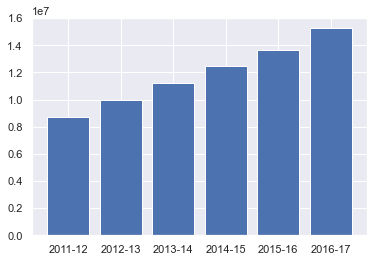

In [79]:
plt.bar(gdp_df["Duration"], gdp_df["All_India GDP"])
plt.show()

## Missing data across the years

In [80]:
duration_list=['2011-12','2012-13','2013-14','2014-15','2015-16', '2016-2017']
for duration in duration_list:
    missing_val = gdp_df[gdp_df['Duration']==duration].isnull().sum().sum()
    print('Total missing values for duration {0}: {1}'.format(duration,missing_val))

Total missing values for duration 2011-12: 0
Total missing values for duration 2012-13: 0
Total missing values for duration 2013-14: 0
Total missing values for duration 2014-15: 0
Total missing values for duration 2015-16: 16
Total missing values for duration 2016-2017: 0.0


## Dividing the DataFrame into two different DataFrames:
- GSDP (Gross Domestic State Product) DataFrame
- DataFrame for Growth Percentage 

In [81]:
gsdp_df = gdp_df[gdp_df['Items  Description'].str.contains('GSDP')]
gsdp_df.drop(columns=['Items  Description'],inplace=True)
gsdp_df

,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,...,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,All_India GDP
0,2011-12,379402.0,11063.0,143175.0,247144.0,158074.0,42367.0,615606.0,297539.0,72720.0,...,227872.0,266628.0,436465.0,11165.0,751485.0,359433.0,19208.0,724049.0,115523.0,8736039.0
1,2012-13,411404.0,12547.0,156864.0,282368.0,177511.0,38120.0,724495.0,347032.0,82820.0,...,258275.0,297734.0,494004.0,12338.0,855481.0,401493.0,21663.0,822903.0,131835.0,9946636.0
2,2013-14,464272.0,14602.0,177745.0,317101.0,206690.0,35921.0,807623.0,400662.0,94764.0,...,291709.0,334714.0,549701.0,13862.0,971090.0,452186.0,25593.0,944146.0,149817.0,11236635.0
3,2014-15,526468.0,16761.0,198098.0,373920.0,234982.0,40633.0,895027.0,437462.0,104369.0,...,321971.0,368011.0,612194.0,15209.0,1092564.0,511178.0,29667.0,1043371.0,161985.0,12433749.0
4,2015-16,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,NaN,...,341887.0,NaN,NaN,16637.0,1212668.0,575631.0,NaN,1153795.0,184091.0,13675331.0
5,2016-17,699307.0,NaN,NaN,NaN,290140.0,NaN,NaN,547396.0,NaN,...,378991.0,NaN,NaN,NaN,1338766.0,654294.0,NaN,NaN,NaN,15251028.0


In [83]:
gsdp_df.describe()

,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu & Kashmir,...,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,All_India GDP
count,6.000000,5.000000,5.000000,5.000000,6.000000,5.000000,5.000000,6.000000,4.000000,5.000000,...,6.000000,4.000000,4.000000,5.000000,6.000000e+00,6.000000,4.000000,5.000000e+00,5.000000,6.000000e+00
mean,515131.166667,14751.400000,180023.200000,326807.200000,221362.166667,40408.600000,807413.400000,419212.500000,88668.250000,96008.600000,...,303450.833333,316771.750000,523091.000000,13842.200000,1.037009e+06,492369.166667,24032.750000,9.376528e+05,148650.200000,1.187990e+07
std,122315.350799,3113.934376,32328.864095,67362.927324,50225.351783,3548.283148,146862.442848,91076.757702,13810.870414,15121.388868,...,55529.341572,44061.383942,75271.849882,2185.718349,2.208264e+05,110499.905621,4585.232846,1.708289e+05,26530.128858,2.405410e+06
min,379402.000000,11063.000000,143175.000000,247144.000000,158074.000000,35921.000000,615606.000000,297539.000000,72720.000000,78254.000000,...,227872.000000,266628.000000,436465.000000,11165.000000,7.514850e+05,359433.000000,19208.000000,7.240490e+05,115523.000000,8.736039e+06
25%,424621.000000,12547.000000,156864.000000,282368.000000,184805.750000,38120.000000,724495.000000,360439.500000,80295.000000,87105.000000,...,266633.500000,289957.500000,479619.250000,12338.000000,8.843832e+05,414166.250000,21049.250000,8.229030e+05,131835.000000,1.026914e+07
50%,495370.000000,14602.000000,177745.000000,317101.000000,220836.000000,40633.000000,807623.000000,419062.000000,88792.000000,95893.000000,...,306840.000000,316224.000000,521852.500000,13862.000000,1.031827e+06,481682.000000,23628.000000,9.441460e+05,149817.000000,1.183519e+07
75%,589067.500000,16761.000000,198098.000000,373920.000000,254327.500000,42367.000000,895027.000000,473253.500000,97165.250000,100404.000000,...,336908.000000,343038.250000,565324.250000,15209.000000,1.182642e+06,559517.750000,26611.500000,1.043371e+06,161985.000000,1.336494e+07
max,699307.000000,18784.000000,224234.000000,413503.000000,290140.000000,45002.000000,994316.000000,547396.000000,104369.000000,118387.000000,...,378991.000000,368011.000000,612194.000000,16637.000000,1.338766e+06,654294.000000,29667.000000,1.153795e+06,184091.000000,1.525103e+07


In [107]:
gsdp_df.median()

Andhra Pradesh         495370.0
Arunachal Pradesh       14602.0
Assam                  177745.0
Bihar                  317101.0
Chhattisgarh           220836.0
Goa                     40633.0
Gujarat                807623.0
Haryana                419062.0
Himachal Pradesh        88792.0
Jammu & Kashmir         95893.0
Jharkhand              188567.0
Karnataka              817886.0
Kerala                 465041.0
Madhya Pradesh         459859.5
Maharashtra           1547986.0
Manipur                 14973.0
Meghalaya               23673.0
Mizoram                  9327.5
Nagaland                15115.5
Odisha                 306840.0
Punjab                 316224.0
Rajasthan              521852.5
Sikkim                  13862.0
Tamil Nadu            1031827.0
Telangana              481682.0
Tripura                 23628.0
Uttar Pradesh          944146.0
Uttarakhand            149817.0
All_India GDP        11835192.0
dtype: float64

In [108]:
gsdp_df.mode()

,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,...,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,All_India GDP
0,2011-12,379402.0,11063.0,143175.0,247144.0,158074.0,35921.0,615606.0,297539.0,72720.0,...,227872.0,266628.0,436465.0,11165.0,751485.0,359433.0,19208.0,724049.0,115523.0,8736039.0
1,2012-13,411404.0,12547.0,156864.0,282368.0,177511.0,38120.0,724495.0,347032.0,82820.0,...,258275.0,297734.0,494004.0,12338.0,855481.0,401493.0,21663.0,822903.0,131835.0,9946636.0
2,2013-14,464272.0,14602.0,177745.0,317101.0,206690.0,40633.0,807623.0,400662.0,94764.0,...,291709.0,334714.0,549701.0,13862.0,971090.0,452186.0,25593.0,944146.0,149817.0,11236635.0
3,2014-15,526468.0,16761.0,198098.0,373920.0,234982.0,42367.0,895027.0,437462.0,104369.0,...,321971.0,368011.0,612194.0,15209.0,1092564.0,511178.0,29667.0,1043371.0,161985.0,12433749.0
4,2015-16,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,NaN,...,341887.0,NaN,NaN,16637.0,1212668.0,575631.0,NaN,1153795.0,184091.0,13675331.0
5,2016-17,699307.0,NaN,NaN,NaN,290140.0,NaN,NaN,547396.0,NaN,...,378991.0,NaN,NaN,NaN,1338766.0,654294.0,NaN,NaN,NaN,15251028.0


In [109]:
gsdp_df.quantile(q=0.5)

Andhra Pradesh         495370.0
Arunachal Pradesh       14602.0
Assam                  177745.0
Bihar                  317101.0
Chhattisgarh           220836.0
Goa                     40633.0
Gujarat                807623.0
Haryana                419062.0
Himachal Pradesh        88792.0
Jammu & Kashmir         95893.0
Jharkhand              188567.0
Karnataka              817886.0
Kerala                 465041.0
Madhya Pradesh         459859.5
Maharashtra           1547986.0
Manipur                 14973.0
Meghalaya               23673.0
Mizoram                  9327.5
Nagaland                15115.5
Odisha                 306840.0
Punjab                 316224.0
Rajasthan              521852.5
Sikkim                  13862.0
Tamil Nadu            1031827.0
Telangana              481682.0
Tripura                 23628.0
Uttar Pradesh          944146.0
Uttarakhand            149817.0
All_India GDP        11835192.0
Name: 0.5, dtype: float64

In [82]:
growth_df = gdp_df[gdp_df['Items  Description'].str.contains('Growth')]
growth_df.drop(columns=['Items  Description'],inplace=True)
growth_df

,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,...,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,All_India GDP
6,2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,13.89,...,13.34,11.67,13.18,10.51,13.84,11.70,12.78,13.65,14.12,13.86
7,2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,14.42,...,12.95,12.42,11.27,12.35,13.51,12.63,18.14,14.73,13.64,12.97
8,2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,10.14,...,10.37,9.95,11.37,9.72,12.51,13.05,15.92,10.51,8.12,10.65
9,2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,NaN,...,6.19,NaN,NaN,9.39,10.99,12.61,NaN,10.58,13.65,9.99
10,2016-17,14.65,NaN,NaN,NaN,11.26,NaN,NaN,12.82,NaN,...,10.85,NaN,NaN,NaN,10.40,13.67,NaN,NaN,NaN,11.52


In [89]:
growth_df.describe()


,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu & Kashmir,...,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,All_India GDP
count,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.00000,5.000000,3.000000,4.000000,...,5.000000,3.000000,3.000000,4.000000,5.000000,5.000000,3.000000,4.000000,4.000000,5.000000
mean,13.036000,14.162500,11.877500,13.765000,12.934000,2.020000,12.76750,12.998000,12.816667,11.002500,...,10.740000,11.346667,11.940000,10.492500,12.250000,12.732000,15.613333,12.367500,12.382500,11.798000
std,2.824266,1.848952,1.763356,3.147809,2.229682,11.619934,3.29248,3.089186,2.333160,5.427162,...,2.850246,1.266346,1.075035,1.324497,1.516031,0.719597,2.693127,2.150324,2.850478,1.603861
min,8.430000,12.070000,9.560000,10.590000,10.980000,-10.020000,10.82000,9.180000,10.140000,4.700000,...,6.190000,9.950000,11.270000,9.390000,10.400000,11.700000,12.780000,10.510000,8.120000,9.990000
25%,12.850000,13.075000,10.977500,11.872500,11.260000,-6.832500,11.02250,10.910000,12.015000,8.742500,...,10.370000,10.810000,11.320000,9.637500,10.990000,12.610000,14.350000,10.562500,12.260000,10.650000
50%,13.400000,14.100000,12.320000,13.275000,12.300000,2.490000,11.28000,12.820000,13.890000,10.700000,...,10.850000,11.670000,11.370000,10.115000,12.510000,12.630000,15.920000,12.115000,13.645000,11.520000
75%,14.650000,15.187500,13.220000,15.167500,13.690000,11.342500,13.02500,15.450000,14.155000,12.960000,...,12.950000,12.045000,12.275000,10.970000,13.510000,13.050000,17.030000,13.920000,13.767500,12.970000
max,15.850000,16.380000,13.310000,17.920000,16.440000,13.120000,17.69000,16.630000,14.420000,17.910000,...,13.340000,12.420000,13.180000,12.350000,13.840000,13.670000,18.140000,14.730000,14.120000,13.860000


In [91]:
growth_df.median()


Andhra Pradesh       13.400
Arunachal Pradesh    14.100
Assam                12.320
Bihar                13.275
Chhattisgarh         12.300
Goa                   2.490
Gujarat              11.280
Haryana              12.820
Himachal Pradesh     13.890
Jammu & Kashmir      10.700
Jharkhand            13.290
Karnataka            13.630
Kerala               12.950
Madhya Pradesh       14.910
Maharashtra          13.740
Manipur              11.390
Meghalaya             9.580
Mizoram              15.200
Nagaland             15.030
Odisha               10.850
Punjab               11.670
Rajasthan            11.370
Sikkim               10.115
Tamil Nadu           12.510
Telangana            12.630
Tripura              15.920
Uttar Pradesh        12.115
Uttarakhand          13.645
All_India GDP        11.520
dtype: float64

In [111]:
growth_df.mode()

,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,...,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,All_India GDP
0,2012-13,8.43,12.07,9.56,10.59,10.98,-10.02,10.82,9.18,10.14,...,6.19,9.95,11.27,9.39,10.40,11.70,12.78,10.51,8.12,9.99
1,2013-14,12.85,13.41,11.45,12.30,11.26,-5.77,11.09,10.91,13.89,...,10.37,11.67,11.37,9.72,10.99,12.61,15.92,10.58,13.64,10.65
2,2014-15,13.40,14.79,13.19,14.25,12.30,10.75,11.47,12.82,14.42,...,10.85,12.42,13.18,10.51,12.51,12.63,18.14,13.65,13.65,11.52
3,2015-16,14.65,16.38,13.31,17.92,13.69,13.12,17.69,15.45,NaN,...,12.95,NaN,NaN,12.35,13.51,13.05,NaN,14.73,14.12,12.97
4,2016-17,15.85,NaN,NaN,NaN,16.44,NaN,NaN,16.63,NaN,...,13.34,NaN,NaN,NaN,13.84,13.67,NaN,NaN,NaN,13.86


In [112]:
growth_df.quantile(0.5)

Andhra Pradesh       13.400
Arunachal Pradesh    14.100
Assam                12.320
Bihar                13.275
Chhattisgarh         12.300
Goa                   2.490
Gujarat              11.280
Haryana              12.820
Himachal Pradesh     13.890
Jammu & Kashmir      10.700
Jharkhand            13.290
Karnataka            13.630
Kerala               12.950
Madhya Pradesh       14.910
Maharashtra          13.740
Manipur              11.390
Meghalaya             9.580
Mizoram              15.200
Nagaland             15.030
Odisha               10.850
Punjab               11.670
Rajasthan            11.370
Sikkim               10.115
Tamil Nadu           12.510
Telangana            12.630
Tripura              15.920
Uttar Pradesh        12.115
Uttarakhand          13.645
All_India GDP        11.520
Name: 0.5, dtype: float64

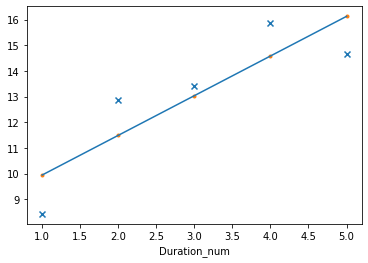

In [16]:
# Making a copy of the dataframe to perform changes in df
growth_cc_df = growth_df.copy()

# Adding a key-value pair to the column "Duration_num" for plotting
growth_cc_df['Duration_num'] = growth_cc_df.Duration.map({'2012-13':1,'2013-14':2,'2014-15':3, '2015-16':4, '2016-17':5})

# Specifying the x and y axes
x=growth_cc_df['Duration_num']
y=growth_cc_df['Andhra Pradesh']

# Fitting the x and y values into a linear polynomial
z = np.polyfit(x,y,deg=1) 

# Returns the actual polynomial
p = np.poly1d(z)

# Plotting the Actual Values
plt.scatter(x,y, marker='x')

# Plotting the Predicted Values
plt.scatter(x, p(x), marker='.')

sns.lineplot(x,p(x))
plt.show()

## Plotting Bar and Line plots of the GSDP Data

In [17]:
#Plots seaborn barlot
plt.style.use('seaborn-white')

def subplot_barplot(dataframe, columns, target):
    sns.set(font_scale=1)
    nrows = int(np.ceil(len(columns)/2)) 
    
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15, len(columns)*3), sharex=False, sharey=False)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate

    # print(ax)

    for i, state in enumerate(columns): # Gives us an index value to get into all our lists
        sns.barplot(x = dataframe[state], y = dataframe[target], data = dataframe, ax=ax[i])
        ax[i].set_title('% Growth over previous year for State {0}'.format(columns[i]))
        ax[i].set_xlabel('Percentage') 
        ax[i].set_ylabel(target)

In [18]:

#Plots seaborn linelot
plt.style.use('seaborn-white')

def subplot_lineplot(dataframe, nation_growth_df, states, target):
    sns.set(font_scale=1)
    nrows = int(np.ceil(len(states)/2)) 

    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15, len(states)*3), sharex=False, sharey=False)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    dataframe['Duration_num'] = dataframe[target].map({'2012-13' : 1, '2013-14' : 2, '2014-15' : 3, '2015-16' : 4, '2016-17':5})
    nation_growth_df['Duration_num'] = nation_growth_df[target].map({'2012-13' : 1, '2013-14' : 2, '2014-15' : 3, '2015-16' : 4, '2016-17':5})
    
    df_slope = pd.DataFrame(columns=['State','Slope'])
    for i, state in enumerate(states):

        x=dataframe['Duration_num']
        y=dataframe[state]
        idx = np.isfinite(x) & np.isfinite(y)
        m,c = np.polyfit(x[idx], y[idx], 1)
        
        row = [states[i],m]
        df_slope.loc[i] = row
        
        
        sns.scatterplot(x='Duration_num',y=state,data = dataframe, markers='x',ax=ax[i], label='{0} Growth%'.format(states[i]))
        sns.lineplot(x,m*x+c,ax=ax[i],label='{0} Growth%'.format(states[i]),markers='o')
        
        x_nation=nation_growth_df['Duration_num']
        y_nation=nation_growth_df['All_India GDP'].fillna(0)
        m_nation,c_nation = np.polyfit(x_nation,y_nation,deg=1) 
        sns.scatterplot(x='Duration_num',y='All_India GDP',data = nation_growth_df, markers='x',ax=ax[i], label='All India Growth%')
        sns.lineplot(x_nation,m_nation*x_nation+c_nation,ax=ax[i], label='All India Growth%',markers='o')
        
        ax[i].set_title('% Growth over previous year for State {0}'.format(states[i]),color='blue')
        ax[i].set_ylabel('Percentage') 
        ax[i].set_xlabel(target)
        ax[i].set_xticklabels(size=10, labels=[' ','2012-13',' ','2013-14',' ','2014-15',' ','2015-16', ' ', '2016-17'])
        
    return df_slope

In [19]:
#Selecting only state columns and creating a new dataframe
col_list=[col for col in growth_df if col!='All_India GDP']
state_list = [col for col in col_list if col!='Duration']

growth_state_df = growth_df[col_list]

In [20]:
growth_state_df

,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,...,Nagaland,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand
6,2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,13.89,...,15.03,13.34,11.67,13.18,10.51,13.84,11.70,12.78,13.65,14.12
7,2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,14.42,...,21.98,12.95,12.42,11.27,12.35,13.51,12.63,18.14,14.73,13.64
8,2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,10.14,...,10.85,10.37,9.95,11.37,9.72,12.51,13.05,15.92,10.51,8.12
9,2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,NaN,...,NaN,6.19,NaN,NaN,9.39,10.99,12.61,NaN,10.58,13.65
10,2016-17,14.65,NaN,NaN,NaN,11.26,NaN,NaN,12.82,NaN,...,NaN,10.85,NaN,NaN,NaN,10.40,13.67,NaN,NaN,NaN


In [21]:
national_gdp_df=growth_df[['Duration','All_India GDP']]
national_gdp_df

,Duration,All_India GDP
6,2012-13,13.86
7,2013-14,12.97
8,2014-15,10.65
9,2015-16,9.99
10,2016-17,11.52


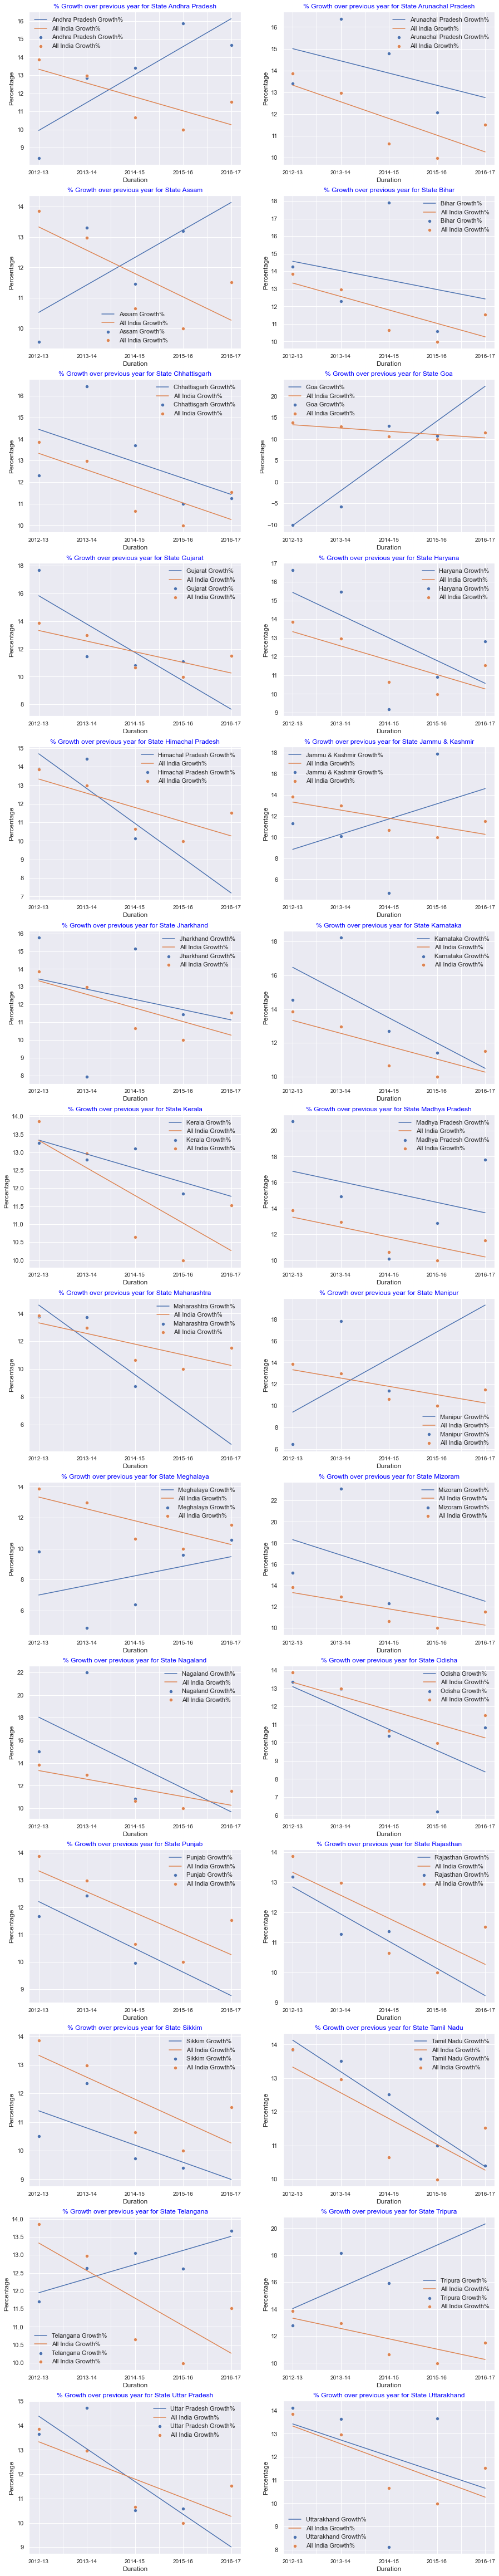

In [22]:
slope_df = subplot_lineplot(growth_state_df, national_gdp_df, state_list, 'Duration')

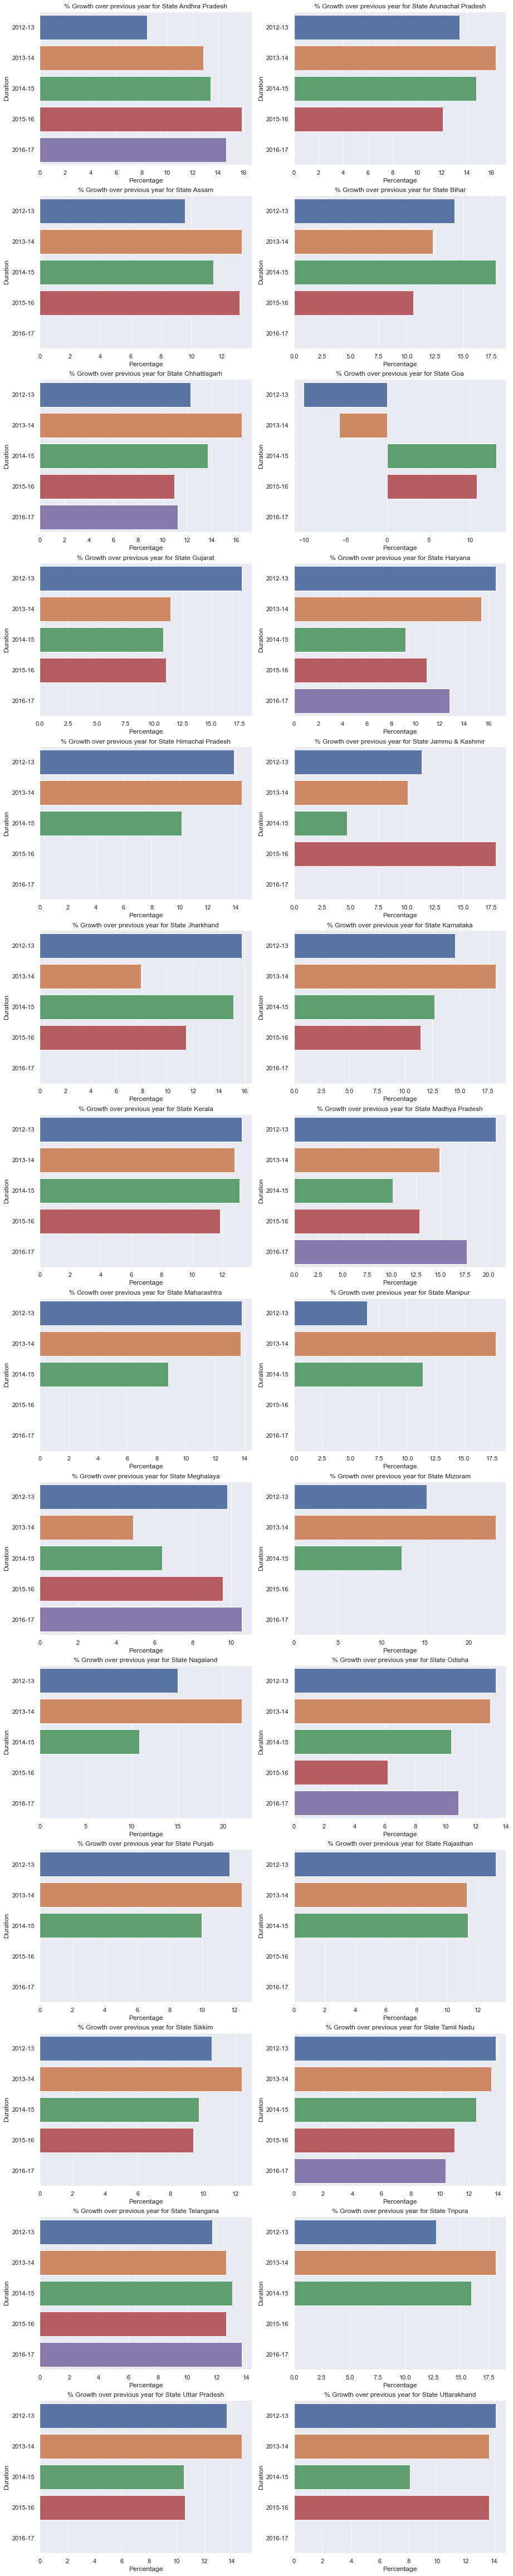

In [23]:
bar_df = subplot_barplot(growth_state_df, state_list, 'Duration')

In [24]:
slope_df.sort_values(by='Slope',ascending=False)

,State,Slope
5,Goa,8.120
15,Manipur,2.470
25,Tripura,1.570
0,Andhra Pradesh,1.544
9,Jammu & Kashmir,1.441
2,Assam,0.903
16,Meghalaya,0.619
24,Telangana,0.392
12,Kerala,-0.391
3,Bihar,-0.536


# Observations from above Plot:
- There is a negtaive trend in %growth of GDP of India as can be seen from above plot. The %growth of nation is continuously decreasing from yr 2012-13 till 2016-17
 - Andhra Pradesh, Assam, Goa, Jammu & Kashmir, Manipur, Telangana, Tripura, Meghalaya states have continuos trend of increase in %growth over previous years.
 - Out of these Goa has the highest value of positive slope. This means Goa state has continuous trend of increase in %growth of GDP
 - Goa, Manipur, Andhra Pradesh have the highest trend of continous increase in %growth of state GDP
 - Despite India’s average growth being negative, the above states have been growing at an unprecedented range. This could be possible due to multiple factors – low base non-dependence on external factors etc.
 - Madhya Pradesh, Maharashtra, Odisha are the 3 states with continuous low performing trend wrt %growth of state GDP
 - India’s one of largest state Maharashtra has been de-growing more than India’s national average. Other states like Gujarat, Karnataka are also showing negative growth. Mizoram has been de-growing but still not at par with national average (perhaps base effect)

## Plotting the average growth of each state over the years

In [25]:
growth_transpose_df= growth_df.T
growth_transpose_df.rename(columns={6:'2012-13', 7:'2013-14',8:'2014-15',9:'2015-16', 10:'2016-17'},inplace=True)
growth_transpose_df = growth_transpose_df[1:]
growth_transpose_df

,2012-13,2013-14,2014-15,2015-16,2016-17
Andhra Pradesh,8.43,12.85,13.4,15.85,14.65
Arunachal Pradesh,13.41,16.38,14.79,12.07,NaN
Assam,9.56,13.31,11.45,13.19,NaN
Bihar,14.25,12.3,17.92,10.59,NaN
Chhattisgarh,12.3,16.44,13.69,10.98,11.26
Goa,-10.02,-5.77,13.12,10.75,NaN
Gujarat,17.69,11.47,10.82,11.09,NaN
Haryana,16.63,15.45,9.18,10.91,12.82
Himachal Pradesh,13.89,14.42,10.14,NaN,NaN
Jammu & Kashmir,11.31,10.09,4.7,17.91,NaN


In [26]:
growth_transpose_df['Average_Growth'] = round(growth_transpose_df.mean(axis=1),2)
growth_transpose_df.sort_values(by='Average_Growth',ascending=False)

,2012-13,2013-14,2014-15,2015-16,2016-17,Average_Growth
Mizoram,15.2,23.1,12.3,NaN,NaN,16.87
Nagaland,15.03,21.98,10.85,NaN,NaN,15.95
Tripura,12.78,18.14,15.92,NaN,NaN,15.61
Madhya Pradesh,20.71,14.91,10.11,12.86,17.74,15.27
Karnataka,14.56,18.24,12.7,11.42,NaN,14.23
Arunachal Pradesh,13.41,16.38,14.79,12.07,NaN,14.16
Bihar,14.25,12.3,17.92,10.59,NaN,13.76
Andhra Pradesh,8.43,12.85,13.4,15.85,14.65,13.04
Haryana,16.63,15.45,9.18,10.91,12.82,13.00
Chhattisgarh,12.3,16.44,13.69,10.98,11.26,12.93


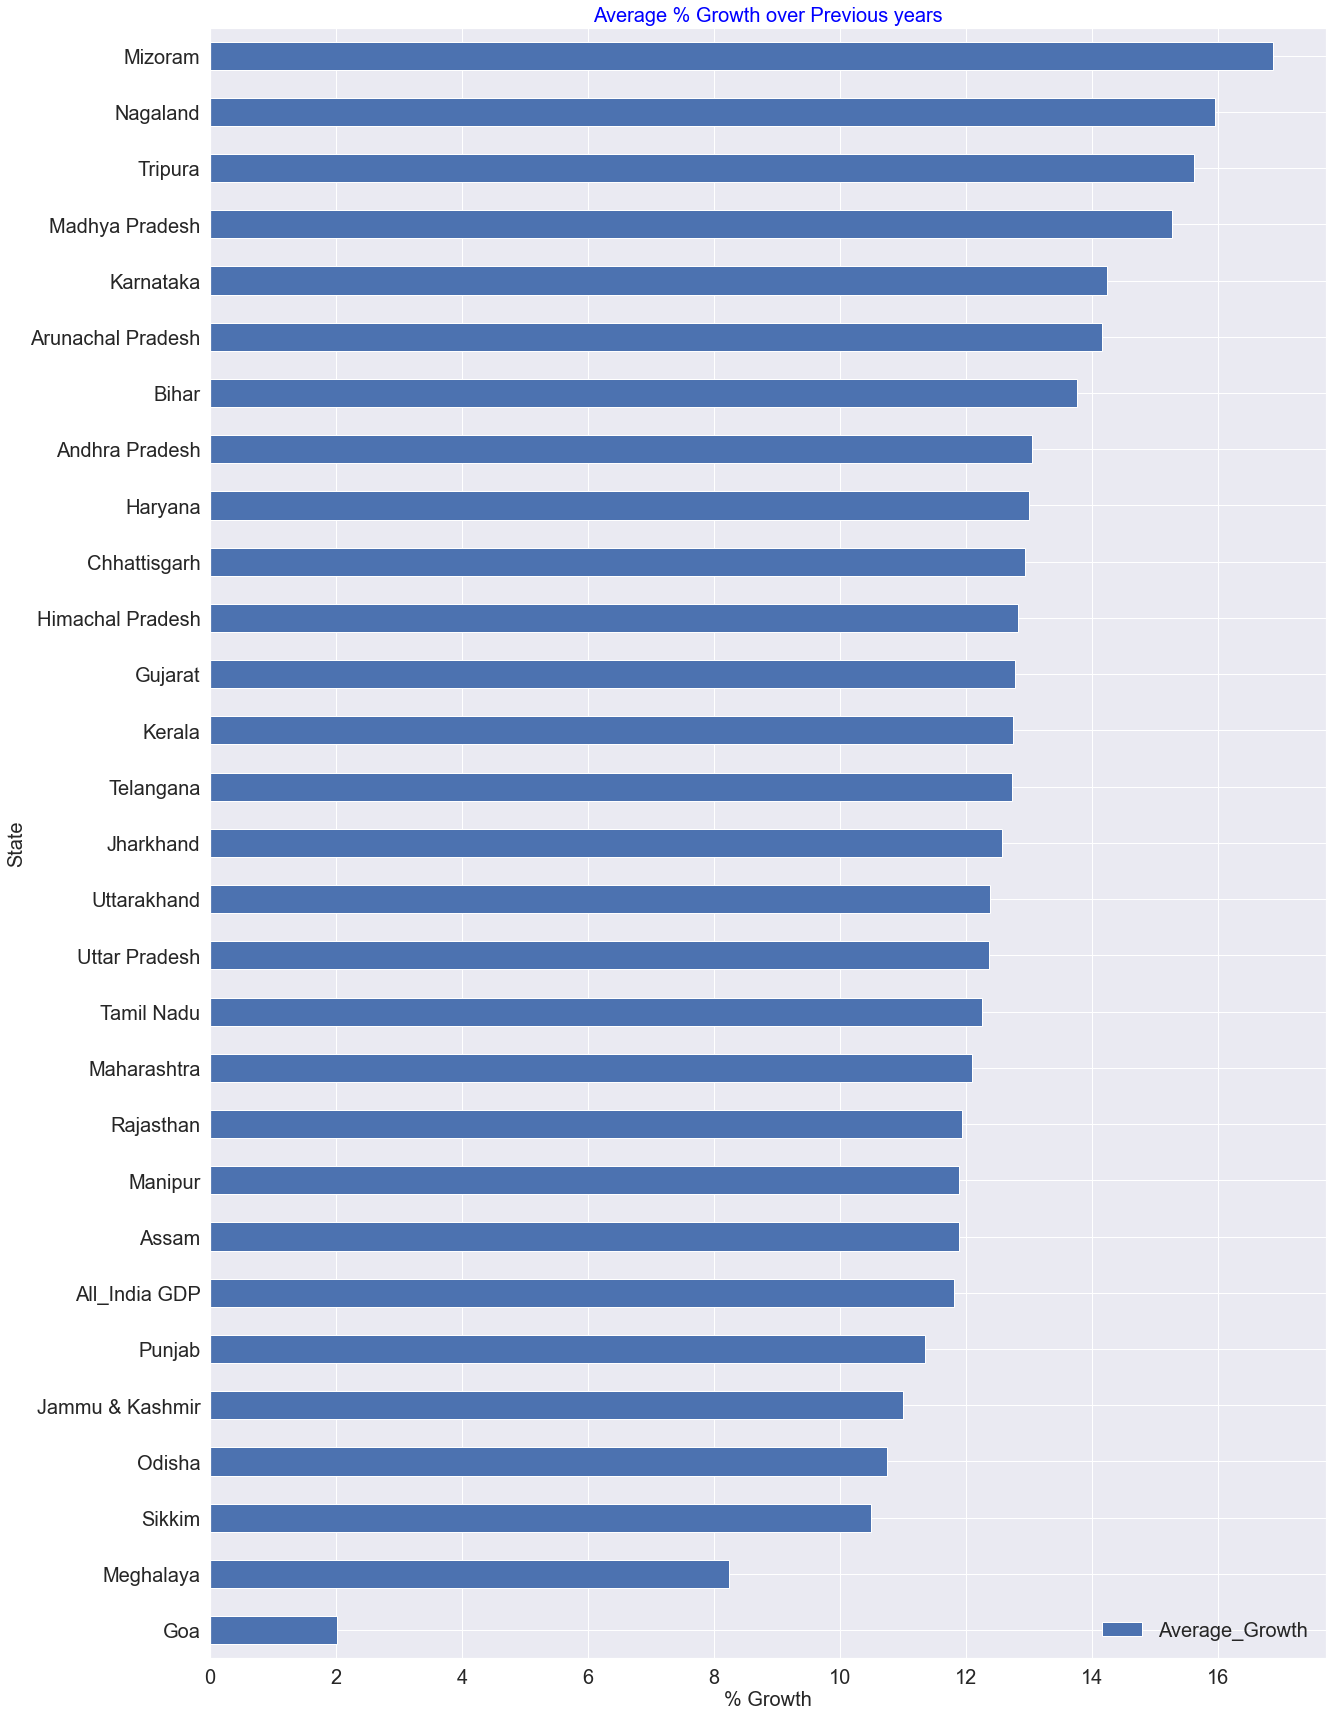

In [27]:
plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=20)  # fontsize of the figure title
growth_transpose_df['Average_Growth'].sort_values(ascending=True).plot(kind='barh', figsize=(20,30))
plt.title('Average % Growth over Previous years',color='blue')
plt.ylabel('State')
plt.xlabel('% Growth')
plt.legend()

## Observation from the above figure
- The States of Punjab, Jammu and Kashmir, Odisha, Sikkim, Meghalaya and Goa have GDP growth percentage lower than national GDP growth percentage (2012 - 17)



# Part II - Finding the leading contributors to the state GDP

In [28]:
path = './datasets/states/*.csv'
all_files = glob.glob(path)
files_list=[]
states_datacheck = pd.DataFrame(index=['Missingness','Duplicates'])
states_data_list = []

for filename in all_files:
    
    #Retrieveing the state name from the filename
    state = filename.split("\\")[1].split(".")[0]
    stateL = state.split("_")
    state = " ".join(stateL)
    state_df = pd.read_csv(filename,index_col=None,header=0,encoding = 'unicode_escape')

    # We will be performing analysis for the years 2014-15
    state_df = state_df[['S.No.','Item',"2014-15"]]
    # print(state_df)
    
    # Generalising and simplifying the dataset by removing individual industries 
    state_df.drop(state_df.loc[state_df['S.No.'].isin(['1.1','1.2','1.3','1.4','6.1','6.2','7.1','7.2','7.3','7.4','7.5','7.6','7.7'])].index,inplace=True)
    # print(state_df)

    #Transpose the DataFrame
    state_df = state_df.T

    #take the row at index location1 and save it in header variable
    new_header = state_df.iloc[1]
    
    # select only the row with only relevant values by removing unwanted rows like S.No. etc
    state_df = state_df[2:]
    
    # set the columns of this dataframe using the header variable
    state_df.columns = new_header
    
    # Add new column as state name in dataframe
    state_df['State'] = state
    
    #reshuffle columns and bring State column in front
    col_list = list(state_df.columns)
    # print(col_list)
    col_list = col_list[-1:] + col_list[:-1]
    
    state_df = state_df[col_list]
    
    # Append the state's dataframe in the list
    states_data_list.append(state_df)

    # This piece of code will check for missingness and duplicates in each state dataframe
    states_datacheck[state]=[state_df.isnull().sum().sum(),state_df.duplicated().sum()]


# When all files are read and the data is available in final list
# then load that list in dataframe using concatenate function of pandas
all_states_df = pd.concat(states_data_list,axis=0,ignore_index=True)
all_states_df.head()

Item,State,"Agriculture, forestry and fishing",Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,Secondary,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",...,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Tertiary,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.)
0,Andhra Pradesh,14819416,1484300,16303716,4672266,1151729,4664889,10488884,4233400,5076984,...,4405409,2200897,4215389,22032942,48825542,5512100,1690800,52646842,501510,104977
1,Arunachal Pradesh,686117,30842,716959,26120,113527,147842,287489,60421,35203,...,48418,243867,218728,631844,1636292,70099,30272,1676119,14870,112718
2,Assam,3855548,1471149,5326697,2002936,296587,1733568,4033091,2987155,1194568,...,1412466,1373611,1795658,9307109,18666897,1725309,582406,19809800,326780,60621
3,Bihar,7951890,68107,8019997,2189965,345168,3449763,5984896,7448373,3147173,...,3740641,2078171,4587589,22179969,36184863,3213546,2006421,37391988,1101240,33954
4,Chandigarh,16233,179,16412,149631,29741,133321,312693,965781,148302,...,598448,183889,156543,2426008,2755113,52622,23309,2784426,11120,250398


In [29]:
states_datacheck

,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chattisgarh,Delhi,Goa,Gujarat,Haryana,...,Nagaland,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telenghana,Tripura,Uttarakhand,Uttar Pradesh
Missingness,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Duplicates,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Observation from the above dataset
- We can find Total GDP for each state using the following formula
    - Total GSVA = (Primary + Secondary + Tertiary) contributions
    - GSDP = Total GSVA + Taxes on Products - Subsidies on Products
- There are Union Territories present in the above dataset that need to be removed

In [30]:
### Drop UTs from the dataset
print('No of rows {0} and columns {1} before dropping UTs'.format(all_states_df.shape[0],all_states_df.shape[1]))
all_states_df.drop(all_states_df.loc[all_states_df['State'].isin(["Andaman & Nicobar Islands", "Chandigarh", "Delhi", "Puducherry"])].index,inplace=True)
print('No of rows {0} and columns {1} after dropping UTs'.format(all_states_df.shape[0],all_states_df.shape[1]))

No of rows 30 and columns 21 before dropping UTs
No of rows 28 and columns 21 after dropping UTs


In [31]:
all_states_df.sort_values(by='Per Capita GSDP (Rs.)',ascending=False)

Item,State,"Agriculture, forestry and fishing",Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,Secondary,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",...,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Tertiary,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.)
7,Goa,308507,3622,312129,1177608,204110,165819,1547536,380927,189656,...,407099,346486,180431,1738217,3597882,527279,61854,4063307,14950,271793
24,Sikkim,137447,1329,138776,550697,212499,82058,845253,70568,47347,...,75330,119514,149265,483103,1467133,72200,18400,1520933,6330,240274
9,Haryana,8015238.0,25186.0,8040424.0,7756921.0,1101919.0,3702571.0,12561411.0,4986319.0,2560623.0,...,6970183.0,1036377.0,2001581.0,19226568.0,39828404.0,4985670.0,1067867.0,43746207.0,266620.0,164077.0
14,Kerala,5930617,558824,6489442,4273567,482470,7314003,12070040,8557345,4020934,...,7287633,2068915,5728645,29673778,48233259,5189352,822381,52600230,339843,154778
28,Uttarakhand,1601423.0,244549.0,1845972.0,5866252.0,433880.0,1342733.0,7642865.0,1743106.0,1066693.0,...,831307.0,579409.0,982430.0,5587975.0,15076812.0,1434856.0,313139.0,16198529.0,105820.0,153076.0
16,Maharashtra,16475655,5282727,21758383,33660294,4334702,9450211,47445207,15839100,9697246,...,30718051,5426991,10806363,88631076,157834665,25394800,4017300,179212165,1172450,152853
10,Himachal Pradesh,1514981,33385,1548366,2543637,767268,808256,4119162,615496,552234,...,1125937,553974,923164,4133326,9800853,895317,259291,10436879,70840,147330
25,Tamil Nadu,13064238,265536,13329774,18914794,1710379,12216718,32841892,12895842,7188320,...,16830213,3400800,7430115,53343788,99515453,12507325,2766405,109256373,745760,146503
13,Karnataka,11219422,846882,12066304,12953843,1425762,6104799,20484404,8991658,5097652,...,24766393,2232584,5308174,50490630,83041338,11026674,1889206,92178806,635100,145141
8,Gujarat,13769969.0,2117218.0,15887187.0,24087538.0,3409983.0,5526017.0,33023538.0,10178713.0,4555910.0,...,5179502.0,2576195.0,3123413.0,30220377.0,79131102.0,12353171.04,1981546.0,89502727.0,633590.0,141263.0


<AxesSubplot:title={'center':'GDP per Capita for all States for the years 2014-15'}, xlabel='per Capita State GDP', ylabel='State'>

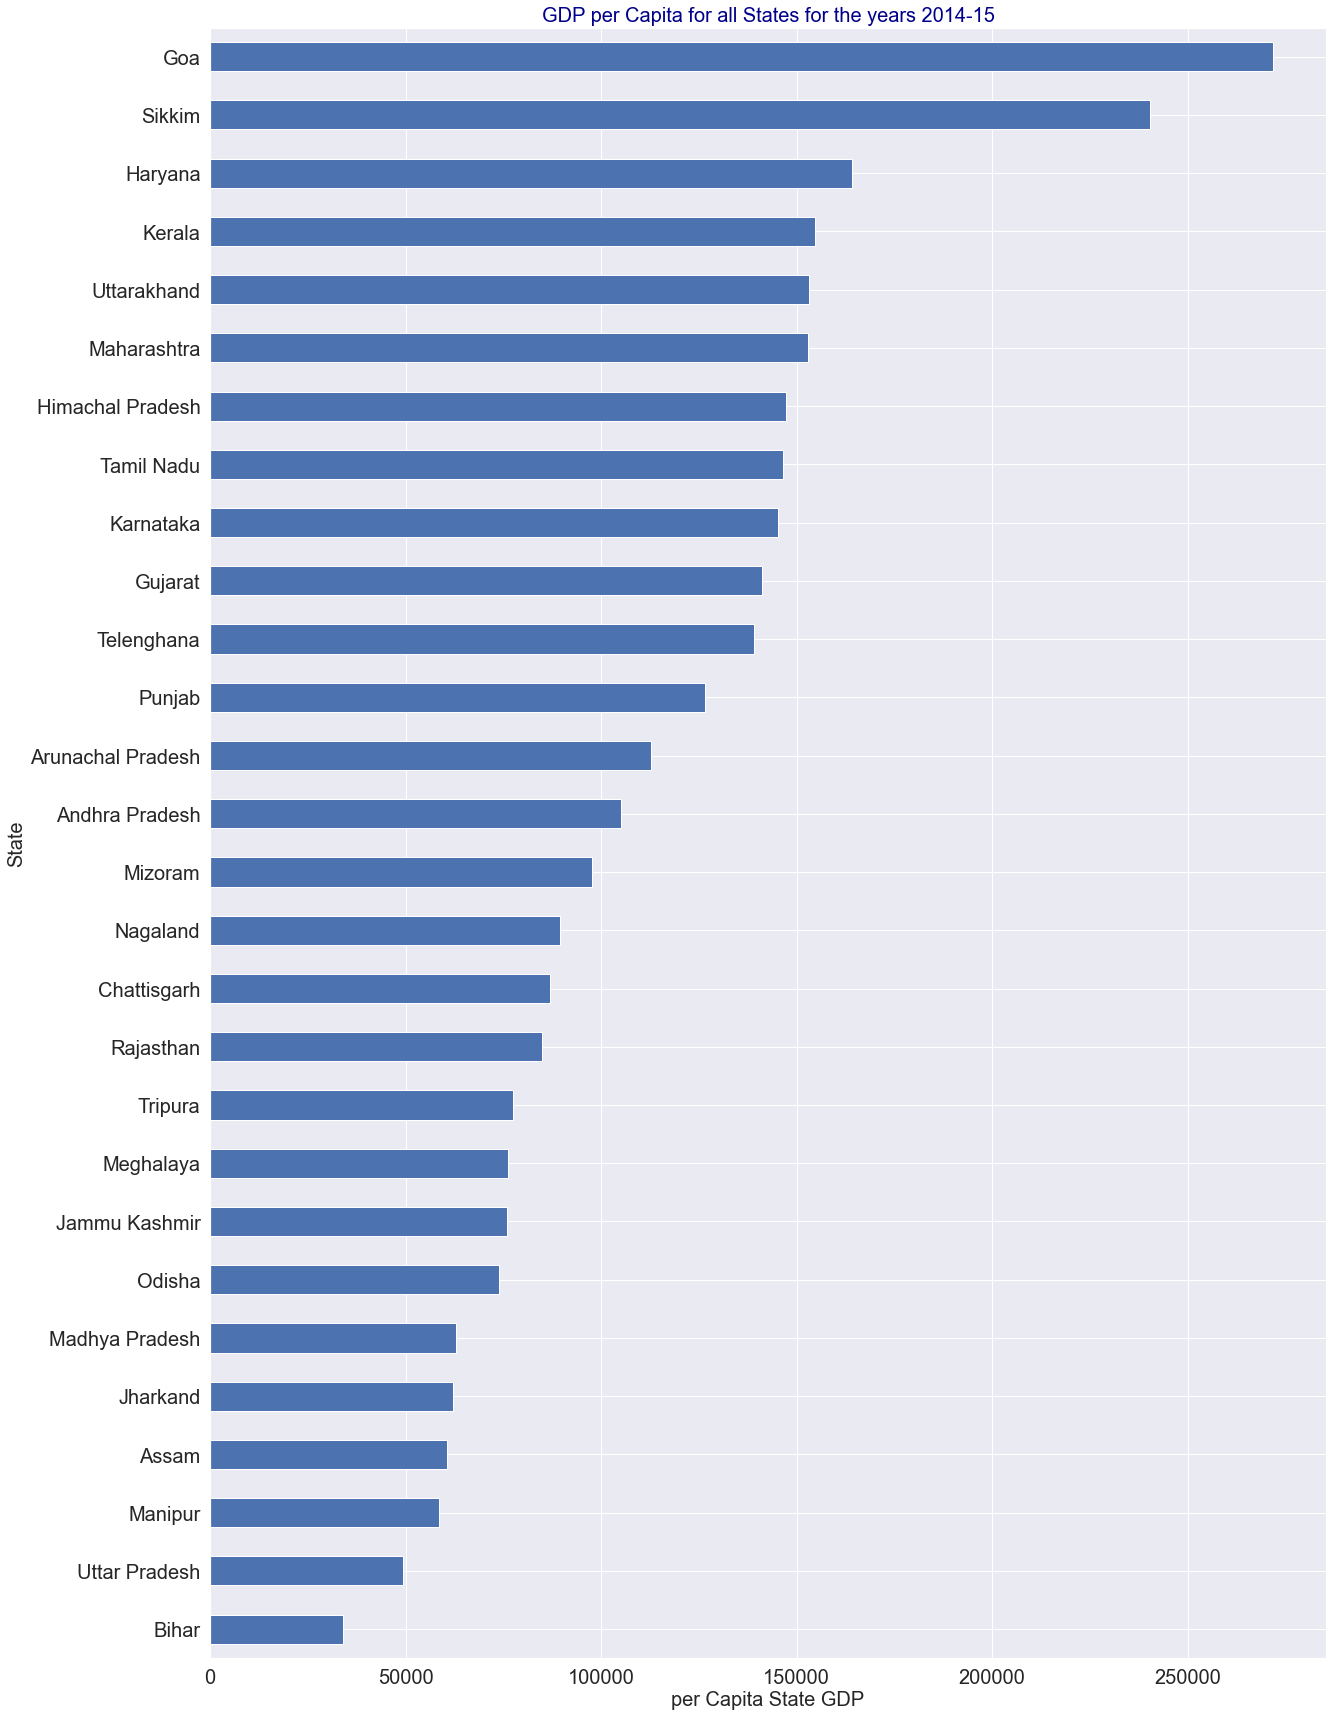

In [32]:
plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=20)  # fontsize of the figure title
plt.title('GDP per Capita for all States for the years 2014-15',color='darkblue')
plt.xlabel('per Capita State GDP')
plt.ylabel('State')
all_states_df.set_index('State')['Per Capita GSDP (Rs.)'].sort_values().plot(kind='barh',figsize=(20,30))

## Adding additional values to the dataset
- Percentage of Primary sectors on GSDP
- Percentage of Secondary sectors on GSDP 
- Percentage of Tertiary sectors on GSDP 
- Percentage of Taxes on the GSDP
- Percentage of Subsidies on GSDP

In [33]:

all_states_df['Primary_Perc'] = ((all_states_df['Primary']/all_states_df['Gross State Domestic Product'])*100).astype(float).round(2)
all_states_df['Secondary_Perc'] = ((all_states_df['Secondary']/all_states_df['Gross State Domestic Product'])*100).astype(float).round(2)
all_states_df['Tertiary_Perc'] = ((all_states_df['Tertiary']/all_states_df['Gross State Domestic Product'])*100).astype(float).round(2)
all_states_df['Taxes_Perc'] = ((all_states_df['Taxes on Products']/all_states_df['Gross State Domestic Product'])*100).astype(float).round(2)
all_states_df['Subsidies_Perc'] = ((all_states_df['Subsidies on products']/all_states_df['Gross State Domestic Product'])*100).astype(float).round(2)
all_states_df['AllSectors_Perc'] = all_states_df['Primary_Perc'] + all_states_df['Secondary_Perc'] + all_states_df['Tertiary_Perc']
all_states_df

Item,State,"Agriculture, forestry and fishing",Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,Secondary,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",...,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),Primary_Perc,Secondary_Perc,Tertiary_Perc,Taxes_Perc,Subsidies_Perc,AllSectors_Perc
0,Andhra Pradesh,14819416,1484300,16303716,4672266,1151729,4664889,10488884,4233400,5076984,...,1690800,52646842,501510,104977,30.97,19.92,41.85,10.47,3.21,92.74
1,Arunachal Pradesh,686117,30842,716959,26120,113527,147842,287489,60421,35203,...,30272,1676119,14870,112718,42.77,17.15,37.70,4.18,1.81,97.62
2,Assam,3855548,1471149,5326697,2002936,296587,1733568,4033091,2987155,1194568,...,582406,19809800,326780,60621,26.89,20.36,46.98,8.71,2.94,94.23
3,Bihar,7951890,68107,8019997,2189965,345168,3449763,5984896,7448373,3147173,...,2006421,37391988,1101240,33954,21.45,16.01,59.32,8.59,5.37,96.78
5,Chattisgarh,3948847,2451970,6400817,4370593,1198438,2669855,8238886,1535571,871770,...,1332092,23498180,270530,86860,27.24,35.06,32.30,11.07,5.67,94.60
7,Goa,308507,3622,312129,1177608,204110,165819,1547536,380927,189656,...,61854,4063307,14950,271793,7.68,38.09,42.78,12.98,1.52,88.55
8,Gujarat,13769969.0,2117218.0,15887187.0,24087538.0,3409983.0,5526017.0,33023538.0,10178713.0,4555910.0,...,1981546.0,89502727.0,633590.0,141263.0,17.75,36.90,33.76,13.80,2.21,88.41
9,Haryana,8015238.0,25186.0,8040424.0,7756921.0,1101919.0,3702571.0,12561411.0,4986319.0,2560623.0,...,1067867.0,43746207.0,266620.0,164077.0,18.38,28.71,43.95,11.40,2.44,91.04
10,Himachal Pradesh,1514981,33385,1548366,2543637,767268,808256,4119162,615496,552234,...,259291,10436879,70840,147330,14.84,39.47,39.60,8.58,2.48,93.91
11,Jammu Kashmir,1586705,33621,1620326,893207,597421,785503,2276132,889931,712552,...,233563,10040446,132390,75840,16.14,22.67,55.91,7.61,2.33,94.72


In [34]:

sort_gsdp_df = all_states_df.sort_values(by='Gross State Domestic Product',ascending=True)
sort_gsdp_df

Item,State,"Agriculture, forestry and fishing",Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,Secondary,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",...,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),Primary_Perc,Secondary_Perc,Tertiary_Perc,Taxes_Perc,Subsidies_Perc,AllSectors_Perc
19,Mizoram,217010,8588,225598,8479,128365,133228,270072,114315,52587,...,20440,1155933,11833,97687,19.52,23.36,55.16,3.73,1.77,98.04
24,Sikkim,137447,1329,138776,550697,212499,82058,845253,70568,47347,...,18400,1520933,6330,240274,9.12,55.57,31.76,4.75,1.21,96.45
1,Arunachal Pradesh,686117,30842,716959,26120,113527,147842,287489,60421,35203,...,30272,1676119,14870,112718,42.77,17.15,37.70,4.18,1.81,97.62
17,Manipur,383140.0,NaN,383140.0,49501.0,27490.0,143182.0,220173.0,262950.0,109726.0,...,69137.0,1804276.0,30873.0,58442.0,21.24,12.20,65.25,5.14,3.83,98.69
20,Nagaland,607897,8280,616178,18346,37944,156072,212361,140781,77521,...,37745,1841424,20550,89607,33.46,11.53,53.92,3.13,2.05,98.91
18,Meghalaya,366521.0,84529.0,451050.0,433213.0,54473.0,150256.0,637942.0,383974.0,148189.0,...,62112.0,2440807.0,32020.0,76228.0,18.48,26.14,49.19,8.74,2.54,93.81
27,Tripura,799825.0,142391.0,942216.0,228625.0,77870.0,177899.0,484393.0,390423.0,155956.0,...,94002.0,2966662.0,38350.0,77358.0,31.76,16.33,50.05,5.03,3.17,98.14
7,Goa,308507,3622,312129,1177608,204110,165819,1547536,380927,189656,...,61854,4063307,14950,271793,7.68,38.09,42.78,12.98,1.52,88.55
11,Jammu Kashmir,1586705,33621,1620326,893207,597421,785503,2276132,889931,712552,...,233563,10040446,132390,75840,16.14,22.67,55.91,7.61,2.33,94.72
10,Himachal Pradesh,1514981,33385,1548366,2543637,767268,808256,4119162,615496,552234,...,259291,10436879,70840,147330,14.84,39.47,39.60,8.58,2.48,93.91


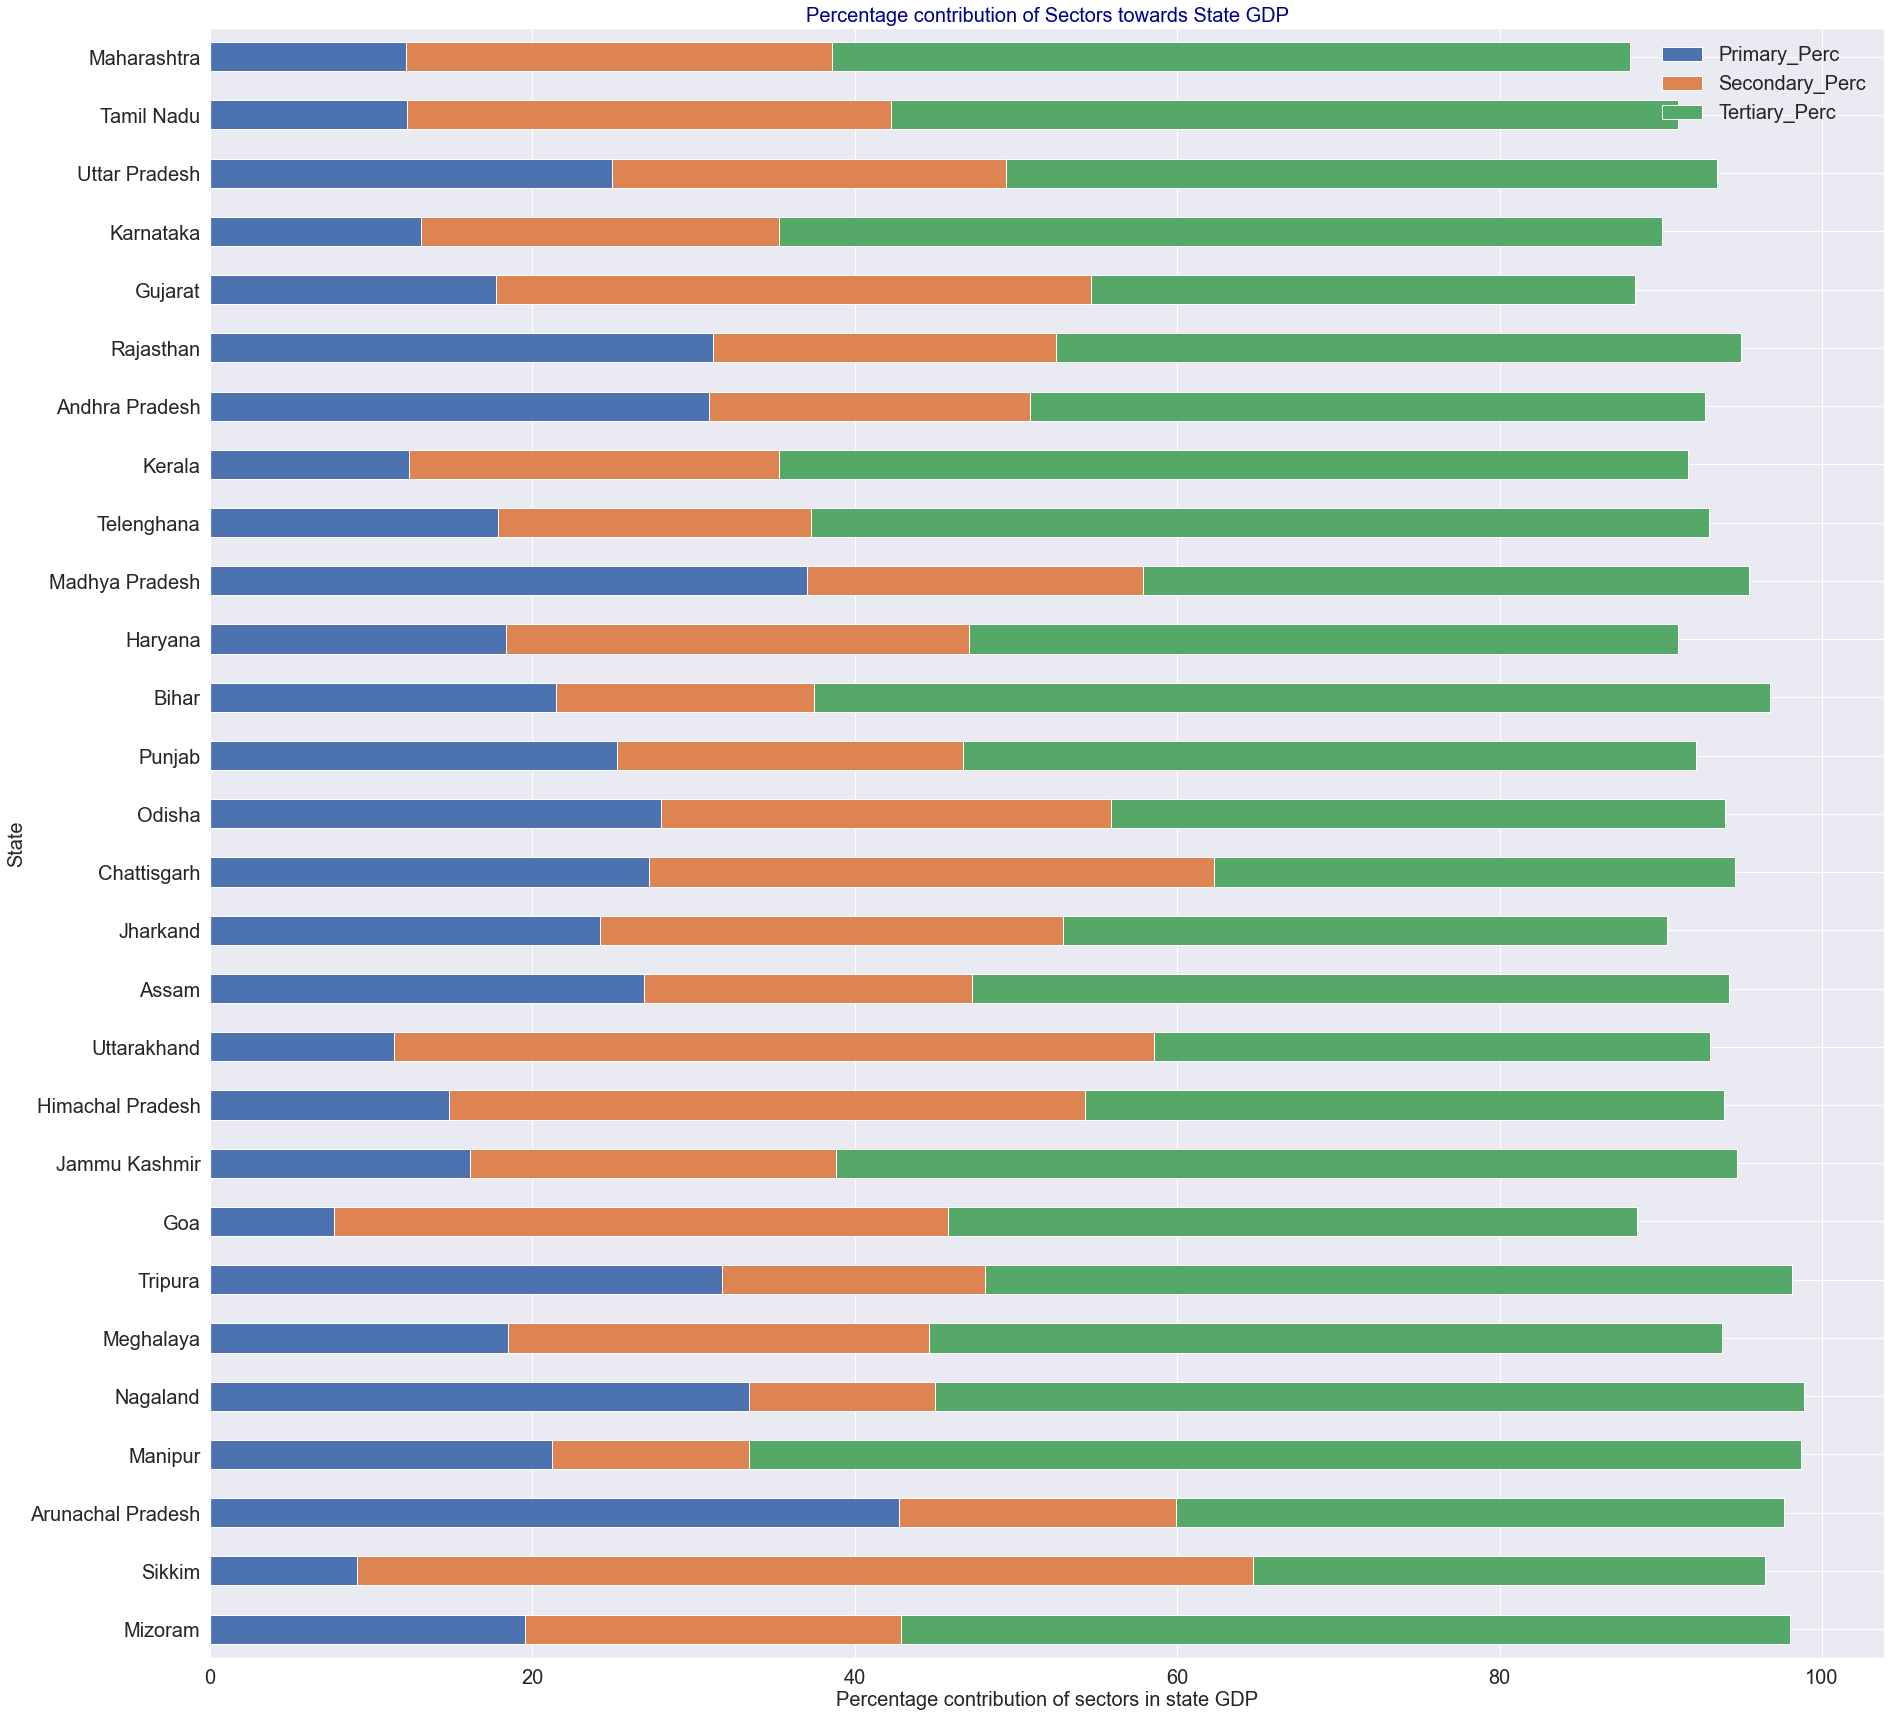

In [35]:
plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=20)  # fontsize of the figure title
sort_gsdp_df[['State','Primary_Perc','Secondary_Perc','Tertiary_Perc']].set_index('State').plot(kind='barh',stacked=True,figsize=(30,30));
plt.title('Percentage contribution of Sectors towards State GDP',color='darkblue')
plt.xlabel('Percentage contribution of sectors in state GDP')
plt.ylabel('State')
plt.legend()

In [36]:
all_states_df['Percentile_Rank'] = round(all_states_df['Gross State Domestic Product'].rank(pct=True),2)
all_states_df

Item,State,"Agriculture, forestry and fishing",Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,Secondary,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",...,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),Primary_Perc,Secondary_Perc,Tertiary_Perc,Taxes_Perc,Subsidies_Perc,AllSectors_Perc,Percentile_Rank
0,Andhra Pradesh,14819416,1484300,16303716,4672266,1151729,4664889,10488884,4233400,5076984,...,52646842,501510,104977,30.97,19.92,41.85,10.47,3.21,92.74,0.79
1,Arunachal Pradesh,686117,30842,716959,26120,113527,147842,287489,60421,35203,...,1676119,14870,112718,42.77,17.15,37.70,4.18,1.81,97.62,0.11
2,Assam,3855548,1471149,5326697,2002936,296587,1733568,4033091,2987155,1194568,...,19809800,326780,60621,26.89,20.36,46.98,8.71,2.94,94.23,0.43
3,Bihar,7951890,68107,8019997,2189965,345168,3449763,5984896,7448373,3147173,...,37391988,1101240,33954,21.45,16.01,59.32,8.59,5.37,96.78,0.61
5,Chattisgarh,3948847,2451970,6400817,4370593,1198438,2669855,8238886,1535571,871770,...,23498180,270530,86860,27.24,35.06,32.30,11.07,5.67,94.60,0.50
7,Goa,308507,3622,312129,1177608,204110,165819,1547536,380927,189656,...,4063307,14950,271793,7.68,38.09,42.78,12.98,1.52,88.55,0.29
8,Gujarat,13769969.0,2117218.0,15887187.0,24087538.0,3409983.0,5526017.0,33023538.0,10178713.0,4555910.0,...,89502727.0,633590.0,141263.0,17.75,36.90,33.76,13.80,2.21,88.41,0.86
9,Haryana,8015238.0,25186.0,8040424.0,7756921.0,1101919.0,3702571.0,12561411.0,4986319.0,2560623.0,...,43746207.0,266620.0,164077.0,18.38,28.71,43.95,11.40,2.44,91.04,0.64
10,Himachal Pradesh,1514981,33385,1548366,2543637,767268,808256,4119162,615496,552234,...,10436879,70840,147330,14.84,39.47,39.60,8.58,2.48,93.91,0.36
11,Jammu Kashmir,1586705,33621,1620326,893207,597421,785503,2276132,889931,712552,...,10040446,132390,75840,16.14,22.67,55.91,7.61,2.33,94.72,0.32


In [37]:
state_category_df = all_states_df.copy()
category_labels = ['C4', 'C3', 'C2', 'C1']
state_category_df['Category'] = pd.qcut(state_category_df['Per Capita GSDP (Rs.)'],q=[0, 0.25, .5, .75, 1],labels=category_labels)
state_category_df

Item,State,"Agriculture, forestry and fishing",Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,Secondary,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",...,Population ('00),Per Capita GSDP (Rs.),Primary_Perc,Secondary_Perc,Tertiary_Perc,Taxes_Perc,Subsidies_Perc,AllSectors_Perc,Percentile_Rank,Category
0,Andhra Pradesh,14819416,1484300,16303716,4672266,1151729,4664889,10488884,4233400,5076984,...,501510,104977,30.97,19.92,41.85,10.47,3.21,92.74,0.79,C2
1,Arunachal Pradesh,686117,30842,716959,26120,113527,147842,287489,60421,35203,...,14870,112718,42.77,17.15,37.70,4.18,1.81,97.62,0.11,C2
2,Assam,3855548,1471149,5326697,2002936,296587,1733568,4033091,2987155,1194568,...,326780,60621,26.89,20.36,46.98,8.71,2.94,94.23,0.43,C4
3,Bihar,7951890,68107,8019997,2189965,345168,3449763,5984896,7448373,3147173,...,1101240,33954,21.45,16.01,59.32,8.59,5.37,96.78,0.61,C4
5,Chattisgarh,3948847,2451970,6400817,4370593,1198438,2669855,8238886,1535571,871770,...,270530,86860,27.24,35.06,32.30,11.07,5.67,94.60,0.50,C3
7,Goa,308507,3622,312129,1177608,204110,165819,1547536,380927,189656,...,14950,271793,7.68,38.09,42.78,12.98,1.52,88.55,0.29,C1
8,Gujarat,13769969.0,2117218.0,15887187.0,24087538.0,3409983.0,5526017.0,33023538.0,10178713.0,4555910.0,...,633590.0,141263.0,17.75,36.90,33.76,13.80,2.21,88.41,0.86,C2
9,Haryana,8015238.0,25186.0,8040424.0,7756921.0,1101919.0,3702571.0,12561411.0,4986319.0,2560623.0,...,266620.0,164077.0,18.38,28.71,43.95,11.40,2.44,91.04,0.64,C1
10,Himachal Pradesh,1514981,33385,1548366,2543637,767268,808256,4119162,615496,552234,...,70840,147330,14.84,39.47,39.60,8.58,2.48,93.91,0.36,C1
11,Jammu Kashmir,1586705,33621,1620326,893207,597421,785503,2276132,889931,712552,...,132390,75840,16.14,22.67,55.91,7.61,2.33,94.72,0.32,C3


In [38]:
def plot_category(df_category_state,category_list):
    sns.set(font_scale=1)
    nrows = int(np.ceil(len(category_list))) 

    fig, ax = plt.subplots(nrows=nrows, ncols=1, figsize=(8,8*len(category_list)), sharex=False, sharey=False)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, category in enumerate(category_list):
        # Filter dataframe based on category
        df2_copy_df= df_category_state[df_category_state['Category']==category]
        #since we have already filtered catgeory so we can drop the category in this dataframe
        df2_copy_df.drop(columns=['Primary','Secondary','Tertiary','TOTAL GSVA at basic prices', 'Taxes on Products','Subsidies on products',"Population ('00)",'Primary_Perc', 'Secondary_Perc','Tertiary_Perc','AllSectors_Perc','Taxes_Perc','Subsidies_Perc','Category'],inplace=True)

        ##Transpose the data
        df2_copy_df = df2_copy_df.T

        ##take the row at index location1 and save it in header variable
        new_header = df2_copy_df.iloc[0]
        df2_copy_df.columns = new_header

        df2_copy_df = df2_copy_df[1:]

        # Create Total column - this is the total of each sub-sector across all states
        df2_copy_df['Total'] = df2_copy_df.sum(axis=1)

        # print(df2_copy_df["Total"])

        # Get Total GSDP of all states belonging to that selected category
        total_gsdp = df2_copy_df.loc['Gross State Domestic Product']['Total']
        
        # Create column of sectorwise percentage wrt Total GSDP
        df2_copy_df['Sector_Per']=round(df2_copy_df['Total']/total_gsdp,2)*100
        
        # Sort the values by Sector wise percentage in descending order
        df2_copy_df.sort_values(by='Sector_Per',ascending=False,inplace=True)
    #     df2_copy_df

        # taking subset of above dataframe to remove GSDP ratio from dataframe
        df2_copy_df = df2_copy_df[1:]

        # Take cumulative sum of sector wise percentage
        df2_copy_df['Cum_Sum'] = df2_copy_df['Sector_Per'].cumsum()

        # Plot the cumulative sum of percentage of sub sectors that contribute to 80% of GSDP. 
        df2_copy_df[df2_copy_df['Cum_Sum']<80]['Sector_Per'].sort_values().plot(kind='barh',ax=ax[i])
        ax[i].set_title('Sub Sectors that contribute to approximately 80% of the GSDP of category: {0}'.format(category), color='blue')
        ax[i].set_xlabel('Sub Sectors %Contribution') 
        ax[i].set_ylabel('Sub Sectors')

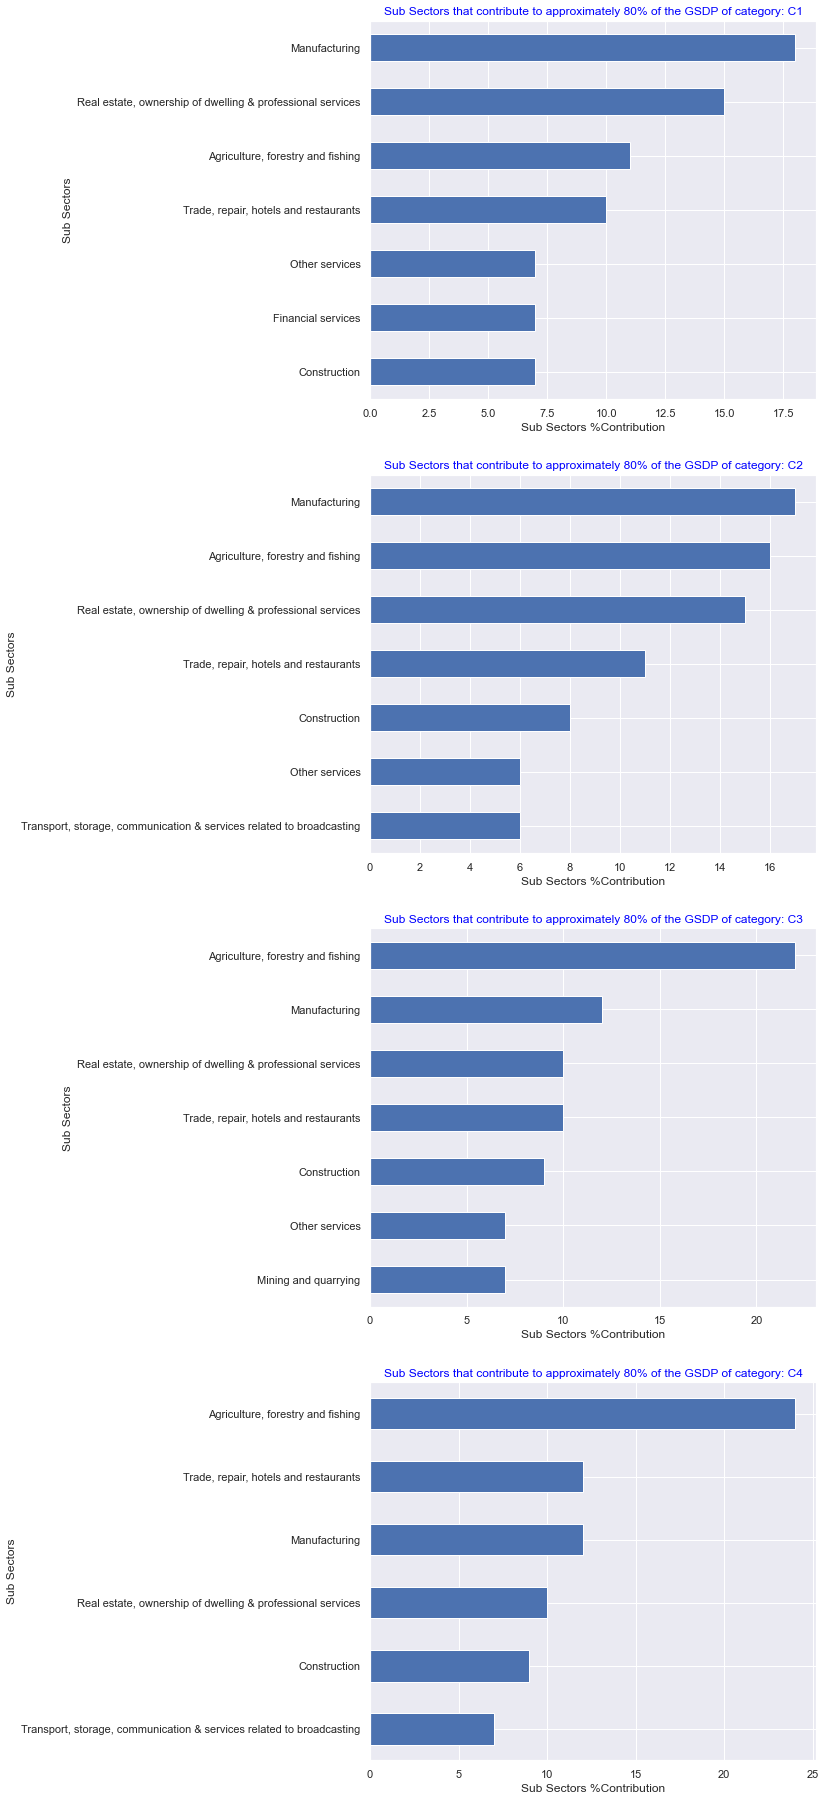

In [39]:
#create category list
category_list = ['C1','C2','C3','C4']

#Call the function to subplot subsectors that contribute to 80% of GSDP - categorywise
plot_category(state_category_df,category_list)

In [40]:
#pd.options.display.float_format = "{:.0f}".format
c1_cat_df= state_category_df[state_category_df['Category']=='C1']
c1_cat_df[['State','Per Capita GSDP (Rs.)','Category']].sort_values(by='Per Capita GSDP (Rs.)',ascending=False)

Item,State,Per Capita GSDP (Rs.),Category
7,Goa,271793,C1
24,Sikkim,240274,C1
9,Haryana,164077.0,C1
14,Kerala,154778,C1
28,Uttarakhand,153076.0,C1
16,Maharashtra,152853,C1
10,Himachal Pradesh,147330,C1


In [41]:
c2_cat_df= state_category_df[state_category_df['Category']=='C2']
c2_cat_df[['State','Per Capita GSDP (Rs.)','Category']].sort_values(by='Per Capita GSDP (Rs.)',ascending=False)

Item,State,Per Capita GSDP (Rs.),Category
25,Tamil Nadu,146503,C2
13,Karnataka,145141,C2
8,Gujarat,141263.0,C2
26,Telenghana,139035,C2
22,Punjab,126606,C2
1,Arunachal Pradesh,112718,C2
0,Andhra Pradesh,104977,C2


In [42]:
c3_cat_df= state_category_df[state_category_df['Category']=='C3']
c3_cat_df[['State','Per Capita GSDP (Rs.)','Category']].sort_values(by='Per Capita GSDP (Rs.)',ascending=False)

Item,State,Per Capita GSDP (Rs.),Category
19,Mizoram,97687,C3
20,Nagaland,89607,C3
5,Chattisgarh,86860,C3
23,Rajasthan,84837,C3
27,Tripura,77358.0,C3
18,Meghalaya,76228.0,C3
11,Jammu Kashmir,75840,C3


In [43]:
c4_cat_df= state_category_df[state_category_df['Category']=='C4']
c4_cat_df[['State','Per Capita GSDP (Rs.)','Category']].sort_values(by='Per Capita GSDP (Rs.)',ascending=False)


Item,State,Per Capita GSDP (Rs.),Category
21,Odisha,73979,C4
15,Madhya Pradesh,62989,C4
12,Jharkand,62091,C4
2,Assam,60621,C4
17,Manipur,58442.0,C4
29,Uttar Pradesh,49450,C4
3,Bihar,33954,C4


(array([0.e+00, 1.e+08, 2.e+08, 3.e+08, 4.e+08, 5.e+08]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

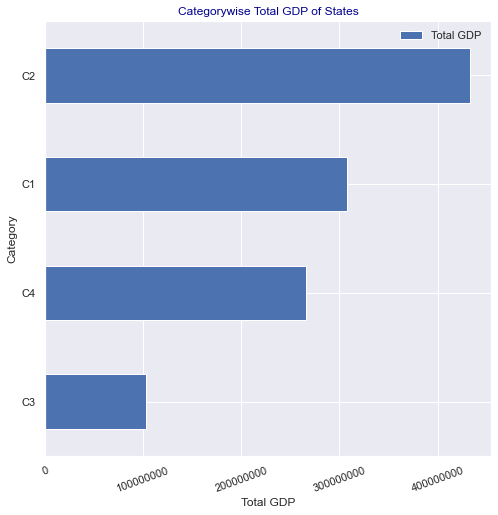

In [44]:
#create category list
category_list = ['C1','C2','C3','C4']
df1 = pd.DataFrame(columns=['C1','C2','C3','C4'])
#Call the function to subplot Cetegorywise GDP dstribution of various states
for category in category_list:
    df1['{0}'.format(category)]= [state_category_df[state_category_df['Category']==category]['Gross State Domestic Product'].sum()]
df1 = df1.T.rename(columns={0:'Total GDP'}).sort_values(by='Total GDP',ascending=True)
df1.plot(kind='barh',figsize=(8,8))
plt.title('Categorywise Total GDP of States',color='darkblue')
plt.xlabel('Total GDP')
plt.ylabel('Category')
plt.ticklabel_format(axis="x", style='plain')
plt.xticks(rotation=20)
#plt.xticks(range(10000000,900000000,80000000),rotation=20);

# Part III - Impact of education drop out rate on GSDP

In [45]:
dropout_df = pd.read_csv('./datasets/rop-Out_Rate_from_2012-13_to_2014-15.csv')
dropout_df.head()

,Sl. No.,Level of Education - State,Primary - 2012-2013,Primary - 2014-2015,Primary - 2014-2015.1,Upper Primary - 2012-2013,Upper Primary - 2013-2014,Upper Primary - 2014-2015,Secondary - 2012-2013,Secondary - 2013-2014,Secondary - 2014-2015,Senior Secondary - 2012-2013,Senior Secondary - 2013-2014,Senior Secondary - 2014-2015
0,1,A & N Islands,0.68,1.21,0.51,1.23,0.51,1.69,5.56,7.20,9.87,14.14,15.87,16.93
1,2,Andhra Pradesh,3.18,4.35,6.72,3.36,3.78,5.20,12.72,12.65,15.71,0.35,11.79,NaN
2,3,Arunachal Pradesh,15.16,10.89,10.82,7.47,5.59,6.71,12.93,14.49,17.11,5.11,17.07,18.42
3,4,Assam,6.24,7.44,15.36,7.20,7.05,10.51,26.77,30.43,27.06,4.69,7.24,NaN
4,5,Bihar,NaN,2.09,NaN,NaN,2.98,4.08,30.14,25.33,25.90,NaN,NaN,NaN


In [46]:
pd.DataFrame([[dropout_df.shape],
            [dropout_df.isnull().sum().sum()],
             [dropout_df.duplicated().sum()]],
            columns = ['Dropout Rate Data Set'],
            index = ['Shape', 'Missingness', 'Duplicates'])

,Dropout Rate Data Set
Shape,"(37, 14)"
Missingness,65
Duplicates,0


In [47]:
dropout_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Sl. No.                       37 non-null     object 
 1   Level of Education - State    37 non-null     object 
 2   Primary - 2012-2013           29 non-null     float64
 3   Primary - 2014-2015           33 non-null     float64
 4   Primary - 2014-2015.1         31 non-null     float64
 5   Upper Primary - 2012-2013     31 non-null     float64
 6   Upper Primary - 2013-2014     35 non-null     float64
 7   Upper Primary - 2014-2015     35 non-null     float64
 8   Secondary - 2012-2013         34 non-null     float64
 9   Secondary - 2013-2014         36 non-null     float64
 10  Secondary - 2014-2015         36 non-null     float64
 11  Senior Secondary - 2012-2013  24 non-null     float64
 12  Senior Secondary - 2013-2014  27 non-null     float64
 13  Senior 

In [48]:
dropout_df['Level of Education - State'].value_counts

<bound method IndexOpsMixin.value_counts of 0            A & N Islands
1           Andhra Pradesh
2        Arunachal Pradesh
3                    Assam
4                    Bihar
5               Chandigarh
6              Chhatisgarh
7     Dadra & Nagar Haveli
8              Daman & Diu
9                    Delhi
10                     Goa
11                 Gujarat
12                 Haryana
13        Himachal Pradesh
14       Jammu and Kashmir
15               Jharkhand
16               Karnataka
17                  Kerala
18             Lakshadweep
19          Madhya Pradesh
20             Maharashtra
21                 Manipur
22               Meghalaya
23                 Mizoram
24                Nagaland
25                  Odisha
26              Puducherry
27                  Punjab
28               Rajasthan
29                  Sikkim
30              Tamil Nadu
31               Telangana
32                 Tripura
33           Uttar Pradesh
34              Uttrakhand
35         

In [49]:
print('no. of rows: {0} and columns: {1} before dropping Union Territories'.format(dropout_df.shape[0],dropout_df.shape[1]))
dropout_df.drop(dropout_df.loc[dropout_df['Level of Education - State'].isin(['A & N Islands','Chandigarh','Dadra & Nagar Haveli', 'Daman & Diu','Delhi','Lakshadweep','Puducherry'])].index,inplace=True)
print('no. of rows: {0} and columns: {1} after dropping Union Territories'.format(dropout_df.shape[0],dropout_df.shape[1]))

no. of rows: 37 and columns: 14 before dropping Union Territories
no. of rows: 30 and columns: 14 after dropping Union Territories


In [50]:
print('no. of rows: {0} and columns: {1} before dropping "West Bengal" State'.format(dropout_df.shape[0],dropout_df.shape[1]))
dropout_df.drop(dropout_df.loc[dropout_df['Level of Education - State'].isin(['West Bengal'])].index,inplace=True)
print('no. of rows: {0} and columns: {1} after dropping "West Bengal" State'.format(dropout_df.shape[0],dropout_df.shape[1]))

no. of rows: 30 and columns: 14 before dropping "West Bengal" State
no. of rows: 29 and columns: 14 after dropping "West Bengal" State


In [51]:
## dropping unwanted columns
dropout_df.columns
print('no. of rows: {0} and columns: {1} before dropping unwanted columns'.format(dropout_df.shape[0],dropout_df.shape[1]))
dropout_df["Primary - 2014-2015"] = dropout_df['Primary - 2014-2015.1']
dropout_df["Upper Primary - 2014-2015"] = dropout_df['Upper Primary - 2014-2015']
dropout_df["Secondary - 2014-2015"] = dropout_df['Secondary - 2014-2015']

dropout_df = dropout_df[['Level of Education - State','Primary - 2014-2015','Upper Primary - 2014-2015','Secondary - 2014-2015']]
print('no. of rows: {0} and columns: {1} after dropping unwanted columns'.format(dropout_df.shape[0],dropout_df.shape[1]))

no. of rows: 29 and columns: 14 before dropping unwanted columns
no. of rows: 29 and columns: 4 after dropping unwanted columns


In [52]:
# Rename column Level of Education - State to State
dropout_df.rename(columns={'Level of Education - State':'State'},inplace=True)
dropout_df

,State,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015
1,Andhra Pradesh,6.72,5.20,15.71
2,Arunachal Pradesh,10.82,6.71,17.11
3,Assam,15.36,10.51,27.06
4,Bihar,NaN,4.08,25.90
6,Chhatisgarh,2.91,5.85,21.26
10,Goa,0.73,0.07,11.15
11,Gujarat,0.89,6.41,25.04
12,Haryana,5.61,5.81,15.89
13,Himachal Pradesh,0.64,0.87,6.07
14,Jammu and Kashmir,6.79,5.44,17.28


In [53]:
state_category_df

Item,State,"Agriculture, forestry and fishing",Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,Secondary,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",...,Population ('00),Per Capita GSDP (Rs.),Primary_Perc,Secondary_Perc,Tertiary_Perc,Taxes_Perc,Subsidies_Perc,AllSectors_Perc,Percentile_Rank,Category
0,Andhra Pradesh,14819416,1484300,16303716,4672266,1151729,4664889,10488884,4233400,5076984,...,501510,104977,30.97,19.92,41.85,10.47,3.21,92.74,0.79,C2
1,Arunachal Pradesh,686117,30842,716959,26120,113527,147842,287489,60421,35203,...,14870,112718,42.77,17.15,37.70,4.18,1.81,97.62,0.11,C2
2,Assam,3855548,1471149,5326697,2002936,296587,1733568,4033091,2987155,1194568,...,326780,60621,26.89,20.36,46.98,8.71,2.94,94.23,0.43,C4
3,Bihar,7951890,68107,8019997,2189965,345168,3449763,5984896,7448373,3147173,...,1101240,33954,21.45,16.01,59.32,8.59,5.37,96.78,0.61,C4
5,Chattisgarh,3948847,2451970,6400817,4370593,1198438,2669855,8238886,1535571,871770,...,270530,86860,27.24,35.06,32.30,11.07,5.67,94.60,0.50,C3
7,Goa,308507,3622,312129,1177608,204110,165819,1547536,380927,189656,...,14950,271793,7.68,38.09,42.78,12.98,1.52,88.55,0.29,C1
8,Gujarat,13769969.0,2117218.0,15887187.0,24087538.0,3409983.0,5526017.0,33023538.0,10178713.0,4555910.0,...,633590.0,141263.0,17.75,36.90,33.76,13.80,2.21,88.41,0.86,C2
9,Haryana,8015238.0,25186.0,8040424.0,7756921.0,1101919.0,3702571.0,12561411.0,4986319.0,2560623.0,...,266620.0,164077.0,18.38,28.71,43.95,11.40,2.44,91.04,0.64,C1
10,Himachal Pradesh,1514981,33385,1548366,2543637,767268,808256,4119162,615496,552234,...,70840,147330,14.84,39.47,39.60,8.58,2.48,93.91,0.36,C1
11,Jammu Kashmir,1586705,33621,1620326,893207,597421,785503,2276132,889931,712552,...,132390,75840,16.14,22.67,55.91,7.61,2.33,94.72,0.32,C3


In [54]:
state_category_states =  list(state_category_df['State'])
dropout_states = list(dropout_df['State'])
state_intersection = set(state_category_states)-set(dropout_states)
state_intersection

{'Chattisgarh', 'Jammu Kashmir', 'Jharkand', 'Telenghana', 'Uttarakhand'}

In [55]:
dropout_intersection = set(dropout_states)-set(state_category_states)
dropout_intersection

{'All India',
 'Chhatisgarh',
 'Jammu and Kashmir',
 'Jharkhand',
 'Telangana',
 'Uttrakhand'}

In [56]:
dropout_intersection.remove('All India')
dropout_intersection

{'Chhatisgarh', 'Jammu and Kashmir', 'Jharkhand', 'Telangana', 'Uttrakhand'}

In [57]:
state_intersection = list(state_intersection)
for i,dropout_state in enumerate(dropout_intersection):
#     print(i, dropout_state)
    dropout_df.loc[dropout_df.loc[dropout_df['State']==dropout_state].index[0],'State']=state_intersection[i]
dropout_df

,State,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015
1,Andhra Pradesh,6.72,5.20,15.71
2,Arunachal Pradesh,10.82,6.71,17.11
3,Assam,15.36,10.51,27.06
4,Bihar,NaN,4.08,25.90
6,Uttarakhand,2.91,5.85,21.26
10,Goa,0.73,0.07,11.15
11,Gujarat,0.89,6.41,25.04
12,Haryana,5.61,5.81,15.89
13,Himachal Pradesh,0.64,0.87,6.07
14,Jammu Kashmir,6.79,5.44,17.28


In [58]:
state_category_states =  list(state_category_df['State'])
dropout_states = list(dropout_df['State'])
state_intersection = set(state_category_states)-set(dropout_states)
print(state_intersection)
dropout_intersection = set(dropout_states)-set(state_category_states)
print(dropout_intersection)

set()
{'All India'}


In [59]:
print('shape of state category df before merge: {0}'.format(state_category_df.shape))
print('shape of dropout df before merge: {0}'.format(dropout_df.shape))
state_dropout_df = pd.merge(state_category_df,dropout_df,on='State',how='left')
print('shape of new df after merge: {0}'.format(state_dropout_df.shape))
state_dropout_df

shape of state category df before merge: (28, 29)
shape of dropout df before merge: (29, 4)
shape of new df after merge: (28, 32)


,State,"Agriculture, forestry and fishing",Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,Secondary,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",...,Secondary_Perc,Tertiary_Perc,Taxes_Perc,Subsidies_Perc,AllSectors_Perc,Percentile_Rank,Category,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015
0,Andhra Pradesh,14819416,1484300,16303716,4672266,1151729,4664889,10488884,4233400,5076984,...,19.92,41.85,10.47,3.21,92.74,0.79,C2,6.72,5.20,15.71
1,Arunachal Pradesh,686117,30842,716959,26120,113527,147842,287489,60421,35203,...,17.15,37.70,4.18,1.81,97.62,0.11,C2,10.82,6.71,17.11
2,Assam,3855548,1471149,5326697,2002936,296587,1733568,4033091,2987155,1194568,...,20.36,46.98,8.71,2.94,94.23,0.43,C4,15.36,10.51,27.06
3,Bihar,7951890,68107,8019997,2189965,345168,3449763,5984896,7448373,3147173,...,16.01,59.32,8.59,5.37,96.78,0.61,C4,NaN,4.08,25.90
4,Chattisgarh,3948847,2451970,6400817,4370593,1198438,2669855,8238886,1535571,871770,...,35.06,32.30,11.07,5.67,94.60,0.50,C3,4.04,1.19,10.40
5,Goa,308507,3622,312129,1177608,204110,165819,1547536,380927,189656,...,38.09,42.78,12.98,1.52,88.55,0.29,C1,0.73,0.07,11.15
6,Gujarat,13769969.0,2117218.0,15887187.0,24087538.0,3409983.0,5526017.0,33023538.0,10178713.0,4555910.0,...,36.90,33.76,13.80,2.21,88.41,0.86,C2,0.89,6.41,25.04
7,Haryana,8015238.0,25186.0,8040424.0,7756921.0,1101919.0,3702571.0,12561411.0,4986319.0,2560623.0,...,28.71,43.95,11.40,2.44,91.04,0.64,C1,5.61,5.81,15.89
8,Himachal Pradesh,1514981,33385,1548366,2543637,767268,808256,4119162,615496,552234,...,39.47,39.60,8.58,2.48,93.91,0.36,C1,0.64,0.87,6.07
9,Jammu Kashmir,1586705,33621,1620326,893207,597421,785503,2276132,889931,712552,...,22.67,55.91,7.61,2.33,94.72,0.32,C3,6.79,5.44,17.28


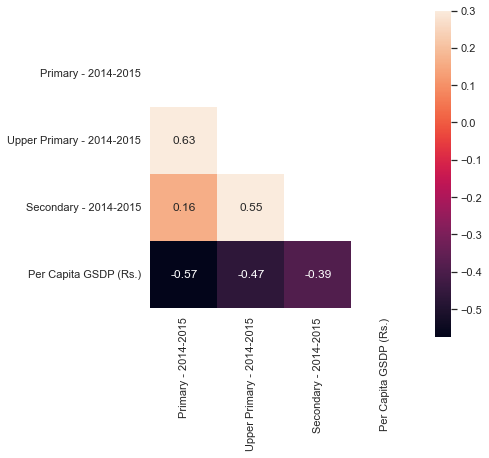

In [60]:
gdp_droput_df = state_dropout_df.copy()
# drop unnecessary columns from dataframe
gdp_droput_df = gdp_droput_df[['Primary - 2014-2015','Upper Primary - 2014-2015','Secondary - 2014-2015','Per Capita GSDP (Rs.)']]
numeric_cols = [col for col in gdp_droput_df]
gdp_droput_df[numeric_cols] = gdp_droput_df[numeric_cols].apply(pd.to_numeric, errors='coerce', axis=1)

plt.figure(figsize=(6,6))
mask = np.zeros_like(gdp_droput_df.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
      sns.heatmap(gdp_droput_df.corr(),mask=mask,vmax=.3, square=True, annot=True,)

In [61]:
def sector_dropout_heatmap(sector_droput_df,education_levels):
    sns.set(font_scale=1)
    nrows = int(np.ceil(len(education_levels)))

    fig, ax = plt.subplots(nrows=nrows, ncols=1, figsize=(5,5*len(education_levels)), sharex=False, sharey=False)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, edu_level in enumerate(education_levels):
        plt.subplots_adjust(hspace = 1.2)
        # drop unnecessary columns from dataframe
        subset_df = sector_droput_df.copy()
        subset_df = subset_df[['Primary_Perc','Secondary_Perc','Tertiary_Perc',edu_level]]
        numeric_cols = [col for col in subset_df]
        subset_df[numeric_cols] = subset_df[numeric_cols].apply(pd.to_numeric, errors='coerce', axis=1)

        mask = np.zeros_like(subset_df.corr())
        mask[np.triu_indices_from(mask)] = True
        with sns.axes_style("white"):
              sns.heatmap(round(subset_df.corr(),2),mask=mask,vmax=.3, square=True, annot=True,ax=ax[i])
              
        ax[i].set_title("Correlation of {0} dropout rate with Sectors".format(edu_level),color='blue')

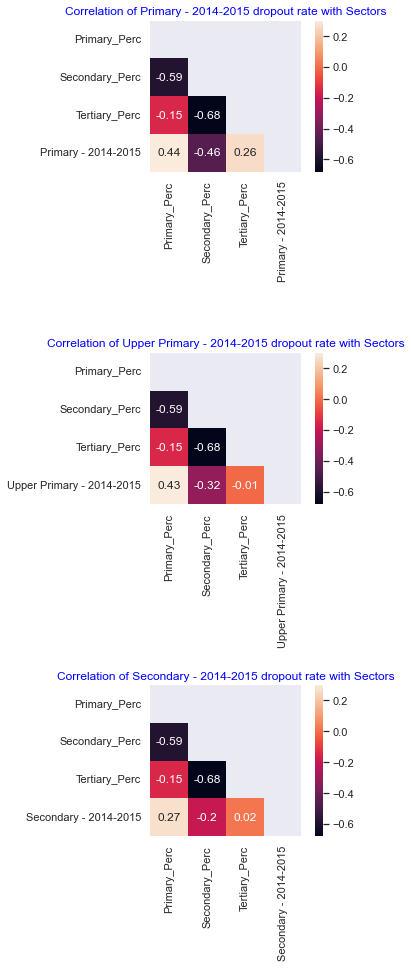

In [62]:
education_levels = ['Primary - 2014-2015','Upper Primary - 2014-2015','Secondary - 2014-2015']
sector_dropout_heatmap(state_dropout_df,education_levels)

# Observations from above plot
- Dropout rate of Primary education level is negative correlated with Secondary Sector %contribution. GDP of such states will decrease given the skilled and educated labor required for secondary sector is not easily available and thus doesn’t encourage industries to be setup. However there is positive correlation with Primary Sector %contribution. Given primary sectors rely on unskilled labor, a drop in primary schools creates a large labor pool helping primary sector and thus contribution to GDP growth.
- Dropout rate of Upper Primary education level is negative correlated with Secondary Sector %contribution. There is also a small negative correlation with Tertiary Sector %Contribution. This means with increase in dropout rate in Upper Primary education level, States with major contribution from Secondary Sectors will get affected. GDP of such states will decrease. However there is positive correlation with Primary Sector %contribution as per reason explained above.
- Dropout rate of Upper Secondary education level is negative correlated with Secondary Sector %contribution. This means with increase in dropout rate in Secondary education level, States with major contribution from Secondary Sectors will get affected. GDP of such states will decrease. However there is positive correlation with Primary Sector %contribution. This means with increase in dropout rate in Secondary education level, States with major contribution from Primary Sectors will see increase in GDP

# Hypothesis from above data of dropout rate and Sector's %contribution and population
- Increase in dropout rate negatively affects Secondary sector and thereby GDP of states with major %contribution from secondary sector
- Government must bring in measures to control dropout rate which will help in increase in GDP of states

In [63]:
state_dropout_df.columns

Index(['State', 'Agriculture, forestry and fishing', 'Mining and quarrying',
       'Primary', 'Manufacturing',
       'Electricity, gas, water supply & other utility services',
       'Construction', 'Secondary', 'Trade, repair, hotels and restaurants',
       'Transport, storage, communication & services related to broadcasting',
       'Financial services',
       'Real estate, ownership of dwelling & professional services',
       'Public administration', 'Other services', 'Tertiary',
       'TOTAL GSVA at basic prices', 'Taxes on Products',
       'Subsidies on products', 'Gross State Domestic Product',
       'Population ('00)', 'Per Capita GSDP (Rs.)', 'Primary_Perc',
       'Secondary_Perc', 'Tertiary_Perc', 'Taxes_Perc', 'Subsidies_Perc',
       'AllSectors_Perc', 'Percentile_Rank', 'Category', 'Primary - 2014-2015',
       'Upper Primary - 2014-2015', 'Secondary - 2014-2015'],
      dtype='object')

In [64]:
# Pearson's Correlation test
from scipy.stats import pearsonr
GDP_parameters = ['Primary', 'Secondary', 'Tertiary', 'Gross State Domestic Product', 'Per Capita GSDP (Rs.)', 'Primary_Perc', 'Secondary_Perc', 'Tertiary_Perc']
Education_parameters = ['Primary - 2014-2015', 'Upper Primary - 2014-2015', 'Secondary - 2014-2015']
for g in GDP_parameters:
    for e in Education_parameters:
        temp_df = state_dropout_df[[g, e]]
        temp_df.dropna(inplace=True)
        x1 = temp_df[g].values
        x2 = temp_df[e].values
        stat, p = pearsonr(x1, x2)
        if p > 0.05:
            pass
            # print(g, e, "Independent")
        else:
            print("GDP Paramter:", g, "\tEducation Paramter:", e, "Dependent")

GDP Paramter: Per Capita GSDP (Rs.) 	Education Paramter: Primary - 2014-2015 Dependent
GDP Paramter: Per Capita GSDP (Rs.) 	Education Paramter: Upper Primary - 2014-2015 Dependent
GDP Paramter: Per Capita GSDP (Rs.) 	Education Paramter: Secondary - 2014-2015 Dependent
GDP Paramter: Primary_Perc 	Education Paramter: Primary - 2014-2015 Dependent
GDP Paramter: Primary_Perc 	Education Paramter: Upper Primary - 2014-2015 Dependent
GDP Paramter: Secondary_Perc 	Education Paramter: Primary - 2014-2015 Dependent


In [65]:
# Spearman's Rank Correlation Test
from scipy.stats import spearmanr
for g in GDP_parameters:
    for e in Education_parameters:
        temp_df = state_dropout_df[[g, e]]
        temp_df.dropna(inplace=True)
        x1 = temp_df[g].values
        x2 = temp_df[e].values
        stat, p = spearmanr(x1, x2)
        if p > 0.05:
            pass
            # print(g, e, "Independent")
        else:
            print("GDP Paramter:", g, "\tEducation Paramter:", e, "Dependent")

GDP Paramter: Per Capita GSDP (Rs.) 	Education Paramter: Primary - 2014-2015 Dependent
GDP Paramter: Per Capita GSDP (Rs.) 	Education Paramter: Secondary - 2014-2015 Dependent
GDP Paramter: Primary_Perc 	Education Paramter: Primary - 2014-2015 Dependent
GDP Paramter: Secondary_Perc 	Education Paramter: Primary - 2014-2015 Dependent


In [66]:
# Kendall's Rank Correlation Test
from scipy.stats import kendalltau
for g in GDP_parameters:
    for e in Education_parameters:
        temp_df = state_dropout_df[[g, e]]
        temp_df.dropna(inplace=True)
        x1 = temp_df[g].values
        x2 = temp_df[e].values
        stat, p = kendalltau(x1, x2)
        if p > 0.05:
            pass
            # print(g, e, "Independent")
        else:
            print("GDP Paramter:", g, "\tEducation Paramter:", e, "Dependent")

GDP Paramter: Per Capita GSDP (Rs.) 	Education Paramter: Primary - 2014-2015 Dependent
GDP Paramter: Per Capita GSDP (Rs.) 	Education Paramter: Secondary - 2014-2015 Dependent
GDP Paramter: Primary_Perc 	Education Paramter: Primary - 2014-2015 Dependent
GDP Paramter: Secondary_Perc 	Education Paramter: Primary - 2014-2015 Dependent


# From the above cella of code we can summarise the following dependencies in our dataset.

    - The GDP per capita of each state is affected by the education dropout rate in Primary, Upper Primary and Secondary levels.

    - The Primary percentage(Primary sector GDP/ Total GDP) is affected by the education dropout rate in Primary, Upper Primary and Secondary levels.

    - The Secondary percentage(Secondary sector GDP/ Total GDP) is affected by the education dropout rate in Primary and Upper Primary levels.